<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia
</center>

## *Tugas Kelompok KASDD: F1 Lap Session*

Kelompok KASDAD Ngab

Anggota Kelompok:

1. Ahmad Rafi Wirana - 2006595873
2. Bintang Nursyawalli Sidi - 2006597790
3. Dzulandra Perkasa - 2006597752
4. Daniel Putra Tama Simarmata - 2006521793



# Deskripsi Dataset

Dataset ini berisi data tentang putaran (lap) dalam balapan Formula 1 dan terdiri dari 18,788 baris dan 31 kolom yang meliputi berbagai informasi mengenai detail lap dalam balapan Formula 1 dengan kolom-kolom sebagai berikut:

* **ID**: Identifikasi unik untuk setiap catatan.
* **Time**: Waktu ketika lap diambil.
* **LapTime**: Durasi lap.
* **Stint**: Nomor stint di mana lap tersebut berada.
* **PitOutTime** dan **PitInTime**: Waktu keluar dan masuk pit stop.
* **Sector1Time**, **Sector2Time**, dan **Sector3Time**: Waktu yang dihabiskan di masing-masing sektor lap.
* **Sector1SessionTime**, **Sector2SessionTime**, **Sector3SessionTime**: Waktu sesi untuk setiap sektor.
* **SpeedI1, SpeedI2, SpeedFL, SpeedST**: Kecepatan di berbagai titik di lap.
* **IsPersonalBest**: Apakah lap merupakan personal best dari driver.
* **Compound**: Jenis compound ban.
* **TyreLife**: Usia ban saat lap.
* **FreshTyre**: Apakah ban dalam kondisi baru.
* **LapStartTime**: Waktu mulai lap.
* **Deleted**: Indikasi apakah catatan telah dihapus.
* **DeletedReason**: Alasan mengapa catatan dihapus, jika ada.
* **AirTemp** (Suhu Udara)
* **Humidity** (Kelembapan Udara)
* **Pressure** (Tekanan Udara)
* **Rainfall** (Curah Hujan)
* **TrackTemp** (Suhu Trek)
* **WindDirection** (Arah Angin)
* **WindSpeed** (Kecepatan Angin).
* **Pos_cat**: Kategori posisi finish (misal, Podium, Point, Participant).



# Import Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, precision_score, recall_score, classification_report, accuracy_score, f1_score,  make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# Import Data

In [ ]:
# Mengimpor data dari dataset f1
f1_df = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")

# Menampilkan data
f1_df.head()

,ID,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,14609,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,3211,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,2497,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,13639,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,1280,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point


In [ ]:
# Menampilkan bentuk dari dataset
total_rows, total_attributes = f1_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 18788
Jumlah atribut: 31


In [ ]:
# Menampilkan ringkasan informasi dataset untuk memahami struktur dan tipe data kolom
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18788 non-null  int64  
 1   Time                18788 non-null  object 
 2   LapTime             18498 non-null  object 
 3   Stint               18788 non-null  float64
 4   PitOutTime          1039 non-null   object 
 5   PitInTime           735 non-null    object 
 6   Sector1Time         18381 non-null  object 
 7   Sector2Time         18749 non-null  object 
 8   Sector3Time         18696 non-null  object 
 9   Sector1SessionTime  18344 non-null  object 
 10  Sector2SessionTime  18749 non-null  object 
 11  Sector3SessionTime  18696 non-null  object 
 12  SpeedI1             15871 non-null  float64
 13  SpeedI2             18749 non-null  float64
 14  SpeedFL             18013 non-null  float64
 15  SpeedST             17096 non-null  float64
 16  IsPe

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik untuk memahami distribusi, tendensi sentral, dan variabilitas.
f1_df.describe()

,ID,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed
count,18788.000000,18788.000000,15871.000000,18749.000000,18013.000000,17096.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000
mean,11749.080530,2.267724,257.529393,246.376447,264.168767,296.618800,14.258037,24.561012,51.980679,986.385336,35.540744,172.751490,1.702427
std,6769.368715,1.072338,46.800654,47.306573,36.533436,31.467891,10.212297,4.337176,14.937573,55.092773,6.596015,91.175864,0.986851
min,0.000000,1.000000,38.000000,50.000000,2.000000,56.000000,1.000000,15.700000,18.000000,778.500000,19.000000,0.000000,0.000000
25%,5912.750000,1.000000,224.000000,210.000000,246.000000,290.000000,6.000000,21.000000,41.000000,992.900000,30.500000,112.000000,1.100000
50%,11730.500000,2.000000,274.000000,256.000000,274.000000,301.000000,12.000000,25.500000,55.000000,1008.200000,33.900000,160.000000,1.500000
75%,17608.500000,3.000000,290.000000,281.000000,288.000000,312.000000,20.000000,27.300000,63.000000,1013.000000,40.800000,233.000000,2.000000
max,23484.000000,8.000000,355.000000,342.000000,355.000000,361.000000,68.000000,31.500000,81.000000,1018.700000,50.200000,359.000000,6.600000


In [ ]:
# Menampilkan statistics untuk setiap atribut non-numerik atau kategorik
f1_df.describe(include=object)

,Time,LapTime,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,IsPersonalBest,Compound,LapStartTime,DeletedReason,Pos_cat
count,18788,18498,1039,735,18381,18749,18696,18344,18749,18696,18758,18788,18788,311,18788
unique,18744,14761,1039,735,11540,12067,10711,18322,18722,18666,2,5,18386,226,3
top,0 days 01:04:24.142000,0 days 00:01:16.993000,0 days 02:25:08.325000,0 days 02:46:17.057000,0 days 00:00:28.315000,0 days 00:00:29.963000,0 days 00:00:25.832000,0 days 01:16:50.684000,0 days 02:19:01.475000,0 days 02:20:24.920000,False,HARD,0 days 01:01:47.219000,TRACK LIMITS AT TURN 10 (NEXT LAP),Participant
freq,4,7,1,1,8,8,9,2,2,2,15266,8972,19,18,8586


In [ ]:
# Menghitung jumlah nilai unik untuk kolom kategorikal
categorical_unique_counts = f1_df.select_dtypes(include=['object', 'bool', 'category']).nunique()
categorical_unique_counts

Time                  18744
LapTime               14761
PitOutTime             1039
PitInTime               735
Sector1Time           11540
Sector2Time           12067
Sector3Time           10711
Sector1SessionTime    18322
Sector2SessionTime    18722
Sector3SessionTime    18666
IsPersonalBest            2
Compound                  5
FreshTyre                 2
LapStartTime          18386
Deleted                   2
DeletedReason           226
Rainfall                  2
Pos_cat                   3
dtype: int64

Pada temuan ini, beberapa kolom memiliki jumlah nilai unik yang tinggi yang berarti menunjukkan variasi dalam data tersebut. Misalnya:
1. Time, LapTime, dan LapStartTime memiliki banyak nilai unik, yang mengindikasikan dataset mencakup banyak momen waktu yang berbeda.
2. Compound memiliki 5 nilai unik, menunjukkan variasi dalam pilihan ban.
3. Pos_cat memiliki 3 nilai unik, kemungkinan mengkategorikan posisi akhir seperti Podium, Point, atau Participant.

In [ ]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df)

,Total,Percent
DeletedReason,18477,0.983447
PitInTime,18053,0.960879
PitOutTime,17749,0.944699
SpeedI1,2917,0.155259
SpeedST,1692,0.090057
SpeedFL,775,0.041250
Sector1SessionTime,444,0.023632
Sector1Time,407,0.021663
LapTime,290,0.015435
Sector3SessionTime,92,0.004897


Berdasarkan analisis nilai yang hilang pada bagian ini, temuan yang dapat diambil adalah:

1. DeletedReason memiliki sekitar 98% nilai yang hilang.
2. PitOutTime dan PitInTime memiliki lebih dari 94% dan 96% nilai yang hilang.

Karena besarnya kekurangan data pada kolom-kolom tersebut, kemungkinan besar kolom tersebut tidak memberikan informasi yang berguna untuk analisis umum performa balapan dan hanya relevan dalam konteks spesifik yang memerlukan informasi tentang strategi pit stop. Kemudian, karena tingginya persentase nilai yang hilang pada bagian DeletedReason menunjukkan bahwa sebagian besar data pada kolom ini dianggap valid dan kurang relevan untuk dianalisis.

In [ ]:
# Mengecek data yang duplikat
print('Jumlah duplikasi pada data adalah', f1_df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


# Data Exploration

**Problem Guide:**

Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)

**Pertanyaan:**
1. Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa?
2. Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?
3. Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak
4. Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?
5. Analisis Performa Berdasarkan Kondisi Cuaca: Bagaimana kondisi cuaca (suhu udara, suhu trek, kelembapan, dan tekanan udara) mempengaruhi performa lap?
6.Korelasi Antara Kondisi Angin dan Performa: Bagaimana kecepatan dan arah angin ('WindSpeed', 'WindDirection') mempengaruhi waktu lap?



## Nomor 1


###Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa? (Bintang)


In [ ]:
# df = pd.DataFrame(f1_df)

# df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
# compound_groups = df.groupby('Compound')['Pos_cat']
# # compound_means = compound_groups.mode()
# # print("Rata-rata waktu lap untuk setiap jenis kompon:")
# # print(compound_means)


df = pd.DataFrame(f1_df)

df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()

# Mengelompokkan berdasarkan 'Compound' dan pilih kolom 'Pos_cat'
compound_groups = df.groupby('Compound')['Pos_cat']

# Menghitung mode untuk 'Pos_cat' dalam setiap grup
compound_modes = compound_groups.apply(lambda x: x.mode().iloc[0])

# Menampilkan data
print("Modus dari kategori posisi untuk setiap jenis kompon:")
print(compound_modes)

Modus dari kategori posisi untuk setiap jenis kompon:
Compound
HARD            Participant
INTERMEDIATE          Point
MEDIUM          Participant
SOFT            Participant
WET             Participant
Name: Pos_cat, dtype: object


In [ ]:
compound_pos_cat_df = df[['Compound', 'Pos_cat']]

# Melakukan pengelompokan dan menghitung jumlah setiap posisi kategori untuk setiap kompon
grouped_counts = compound_pos_cat_df.groupby(['Compound', 'Pos_cat']).size().unstack(fill_value=0)

# Cetak jumlah setiap posisi kategori untuk setiap kompon
total_positions = grouped_counts.sum(axis=1)
percentage_grouped_counts = grouped_counts.divide(total_positions, axis=0) * 100

print("Jumlah setiap kategori posisi untuk setiap jenis kompon:")
print(grouped_counts)
print("")
print("Jumlah dan Persentase setiap kategori posisi untuk setiap jenis kompon:")
print(percentage_grouped_counts)

Jumlah setiap kategori posisi untuk setiap jenis kompon:
Pos_cat       Participant  Podium  Point
Compound                                
HARD                 4417    1262   3293
INTERMEDIATE          226     107    239
MEDIUM               2674    1207   2549
SOFT                 1232     489   1055
WET                    37       1      0

Jumlah dan Persentase setiap kategori posisi untuk setiap jenis kompon:
Pos_cat       Participant     Podium      Point
Compound                                       
HARD            49.230941  14.065983  36.703076
INTERMEDIATE    39.510490  18.706294  41.783217
MEDIUM          41.586314  18.771384  39.642302
SOFT            44.380403  17.615274  38.004323
WET             97.368421   2.631579   0.000000


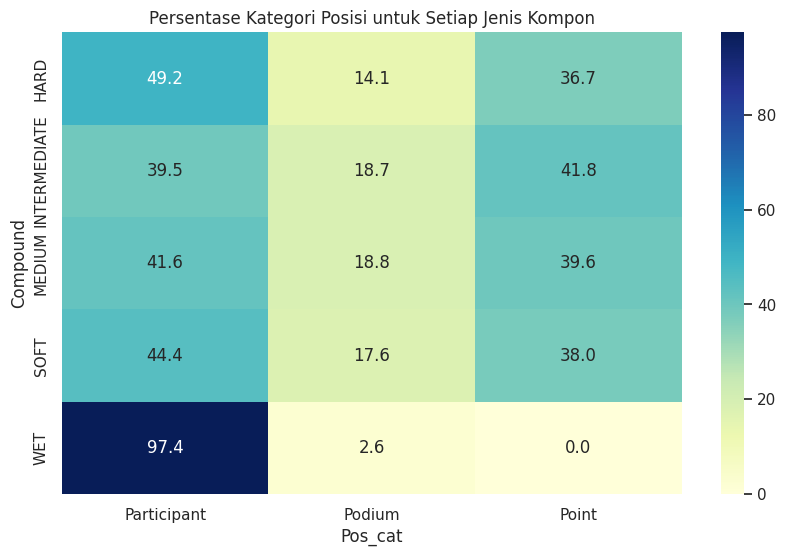

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat heatmap
sns.heatmap(percentage_grouped_counts, annot=True, fmt=".1f", cmap="YlGnBu")

# Menambahkan judul dan label
plt.title("Persentase Kategori Posisi untuk Setiap Jenis Kompon")
plt.xlabel("Pos_cat")
plt.ylabel("Compound")

# Menampilkan heatmap
plt.show()

<Figure size 1000x600 with 0 Axes>

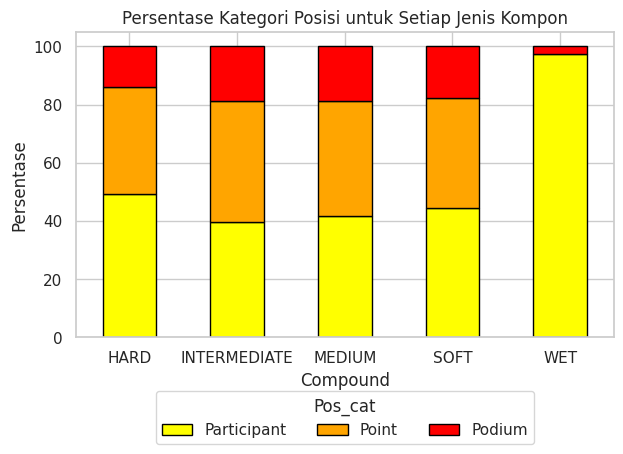

In [ ]:
import matplotlib.pyplot as plt

# Menentukan urutan kolom yang diinginkan
new_column_order = ['Participant', 'Point', 'Podium']
percentage_grouped_counts = percentage_grouped_counts.reindex(columns=new_column_order)

# Menentukan warna untuk setiap kategori
colors = {'Participant': 'yellow', 'Point': 'orange', 'Podium': 'red'}

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat grafik batang
ax = percentage_grouped_counts.plot(kind='bar', stacked=True, color=[colors[col] for col in percentage_grouped_counts.columns], edgecolor='black')

# Menambahkan judul dan label
plt.title("Persentase Kategori Posisi untuk Setiap Jenis Kompon")
plt.xlabel("Compound")
plt.ylabel("Persentase")

# Menambahkan legend di bawah grafik
plt.legend(title='Pos_cat', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Mengatur label sumbu x menjadi miring 90 derajat
plt.xticks(rotation=0)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()


Dilihat dari persentase antara Penggunaan Compound terhadap Podium (Pos_cat) terdapat beberapa hal yang bisa diidentifikasi:

Podium (Best Placement)

*   Compound dengan tipe MEDIUM memiliki performa tertinggi untuk Posisi Podium sebesar 18.8% lalu disusul oleh Compound dengan tipe INTERMEDIATE sebesar 18.7%
*   Compound dengan tipe HARD yang mendapat Posisi Podium sebesar 14.1% lalu terakhir Compound tipe WET sebesar 2.6%

Dari persentase ini, dapat diartikan bahwa jenis Compound turut mempengaruhi placement / Posisi yang didapat. Namun, persentase Podium untuk masing-masing tipe MEDIUM, INTERMEDIATE, HARD tidak terlalu berbeda secara signifikan.

Walaupun persentase untuk tipe Compound WET yang paling rendah diantara lainnya, bukan berarti Compound jenis WET buruk dari segi performa Podium.

Hal ini bisa terjadi karena data pada masing-masing Class Compound yang tidak balance (Imbalance Class)

Oleh karena itu, untuk soal ini memang benar bahwa penggunaan Compound mempengaruhi performa Position tetap tidak mempengaruhi secara signifikan.



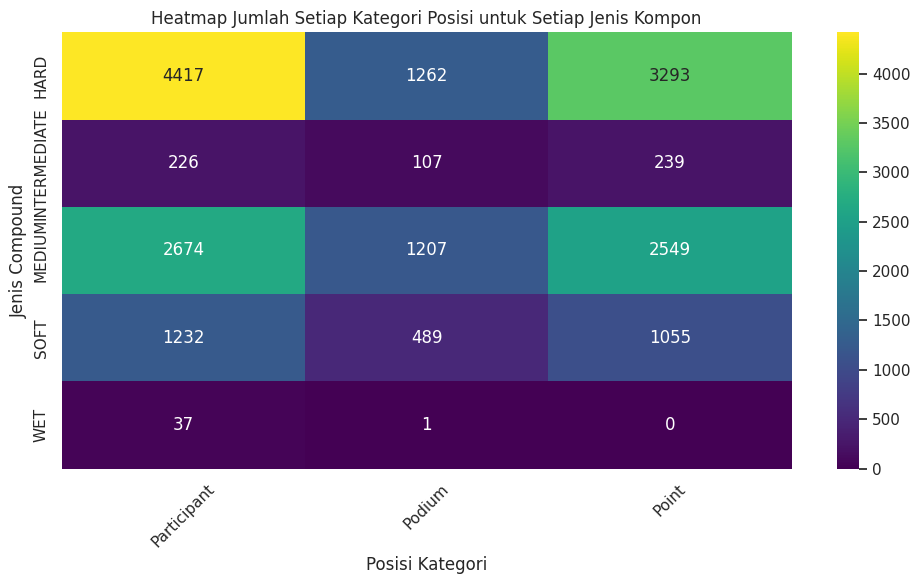

In [ ]:
# Membuat visualisasi heatmap jumlah kategori posisi per jenis compound.
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap Jumlah Setiap Kategori Posisi untuk Setiap Jenis Kompon')
plt.xlabel('Posisi Kategori')
plt.ylabel('Jenis Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ban dengan jenis Compound HARD memiliki jumlah podium yang paling tinggi, diikuti oleh MEDIUM dan SOFT.
Ban dengan jenis INTERMEDIATE juga memiliki penampilan di podium, meskipun jumlahnya jauh lebih sedikit.
Ini menunjukkan bahwa ban dengan jenis HARD cenderung memberikan kinerja yang lebih baik dalam hal mencapai posisi podium

In [ ]:
compounds = df['Compound'].unique()

# Membersihkan nilai NaN
compound_data_cleaned = {compound: df.loc[df['Compound'] == compound, 'LapTime'].dropna() for compound in compounds}

# Menghitung F-statistik dan p-value dengan data yang bersih
f_statistic, p_value = stats.f_oneway(*compound_data_cleaned.values())

print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)

if p_value < 0.05:
    print("Penggunaan 'Compound' yang berbeda berpengaruh secara signifikan terhadap performa.")
else:
    print("Tidak ada bukti yang cukup untuk menyatakan bahwa penggunaan 'Compound' yang berbeda berpengaruh terhadap performa.")


Nilai F-statistic: 19.65518817097679
Nilai p-value: 3.6942690933863315e-16
Penggunaan 'Compound' yang berbeda berpengaruh secara signifikan terhadap performa.


*   H0: Tidak ada perbedaan signifikan dalam waktu lap antara berbagai jenis compound
*  H1: Terdapat perbedaan signifikan dalam waktu lap antara berbagai jenis kompon ban.


kita menghitung F-statistic dan p-value, serta memeriksa apakah perbedaan dalam penggunaan jenis compound berpengaruh secara signifikan terhadap performa. Dari data tersebut dapat terlihat bahwa nilai p_value adalah < 0.05 atau lebih tepatnya (3.6942690933863315e-16') dimana Jika nilai p-value yang diperoleh  kurang dari alpha (p-value < α) maka dapat dikatakan kita dapat menolak h0.



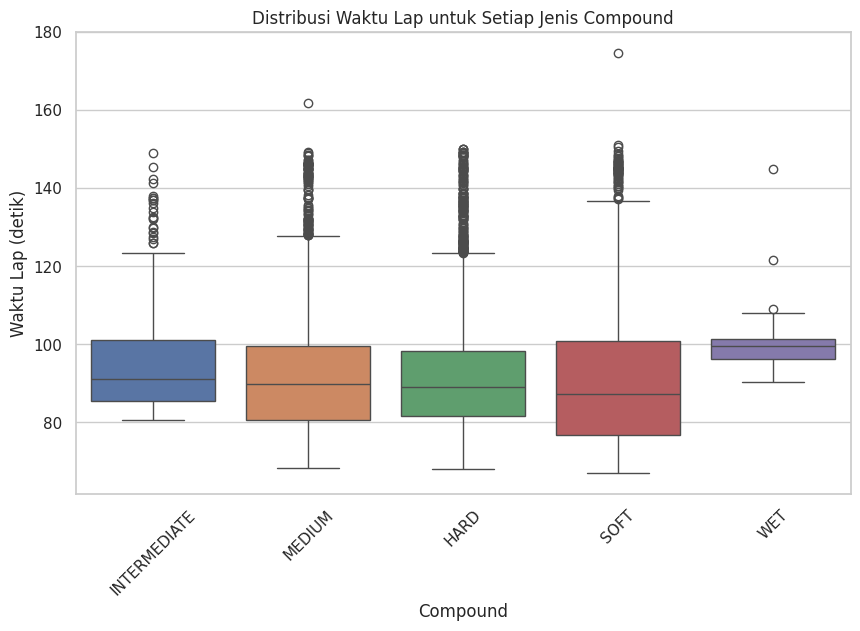

In [ ]:
df_cleaned = pd.DataFrame.from_dict(compound_data_cleaned, orient='index').T

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Distribusi Waktu Lap untuk Setiap Jenis Compound')
plt.xlabel('Compound')
plt.ylabel('Waktu Lap (detik)')
plt.xticks(rotation=45)
plt.show()

## Nomor 3

###Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak (Bintang)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18788 non-null  int64  
 1   Time                18788 non-null  object 
 2   LapTime             18498 non-null  float64
 3   Stint               18788 non-null  float64
 4   PitOutTime          1039 non-null   object 
 5   PitInTime           735 non-null    object 
 6   Sector1Time         18381 non-null  object 
 7   Sector2Time         18749 non-null  object 
 8   Sector3Time         18696 non-null  object 
 9   Sector1SessionTime  18344 non-null  object 
 10  Sector2SessionTime  18749 non-null  object 
 11  Sector3SessionTime  18696 non-null  object 
 12  SpeedI1             15871 non-null  float64
 13  SpeedI2             18749 non-null  float64
 14  SpeedFL             18013 non-null  float64
 15  SpeedST             17096 non-null  float64
 16  IsPe

In [ ]:

df_3 = df.copy()

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom non-numerik
for column in df_3.columns:
    if df_3[column].dtype == 'object':  # Memeriksa apakah kolom non-numerik
        df_3[column] = label_encoder.fit_transform(df_3[column])

# Menampilkan lima baris pertama dari DataFrame df_3
print(df_3.head())


      ID   Time  LapTime  Stint  PitOutTime  PitInTime  Sector1Time  \
0  14609  16243  100.943    6.0         949        735        10884   
1   3211   1943  108.067    1.0        1039        735        10529   
2   2497  15469   82.881    2.0        1039        735         5545   
3  13639     45   91.585    1.0         131        735        11540   
4   1280   8044   94.742    2.0        1039        735         9109   

   Sector2Time  Sector3Time  Sector1SessionTime  ...  Deleted  DeletedReason  \
0         1851         4783               15898  ...    False            226   
1         9870         4342                1625  ...    False            226   
2          345         9674               15113  ...    False            226   
3         1833         7295               18322  ...    False            226   
4         2472         6923                7700  ...    False            226   

   AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  \
0     17.1 

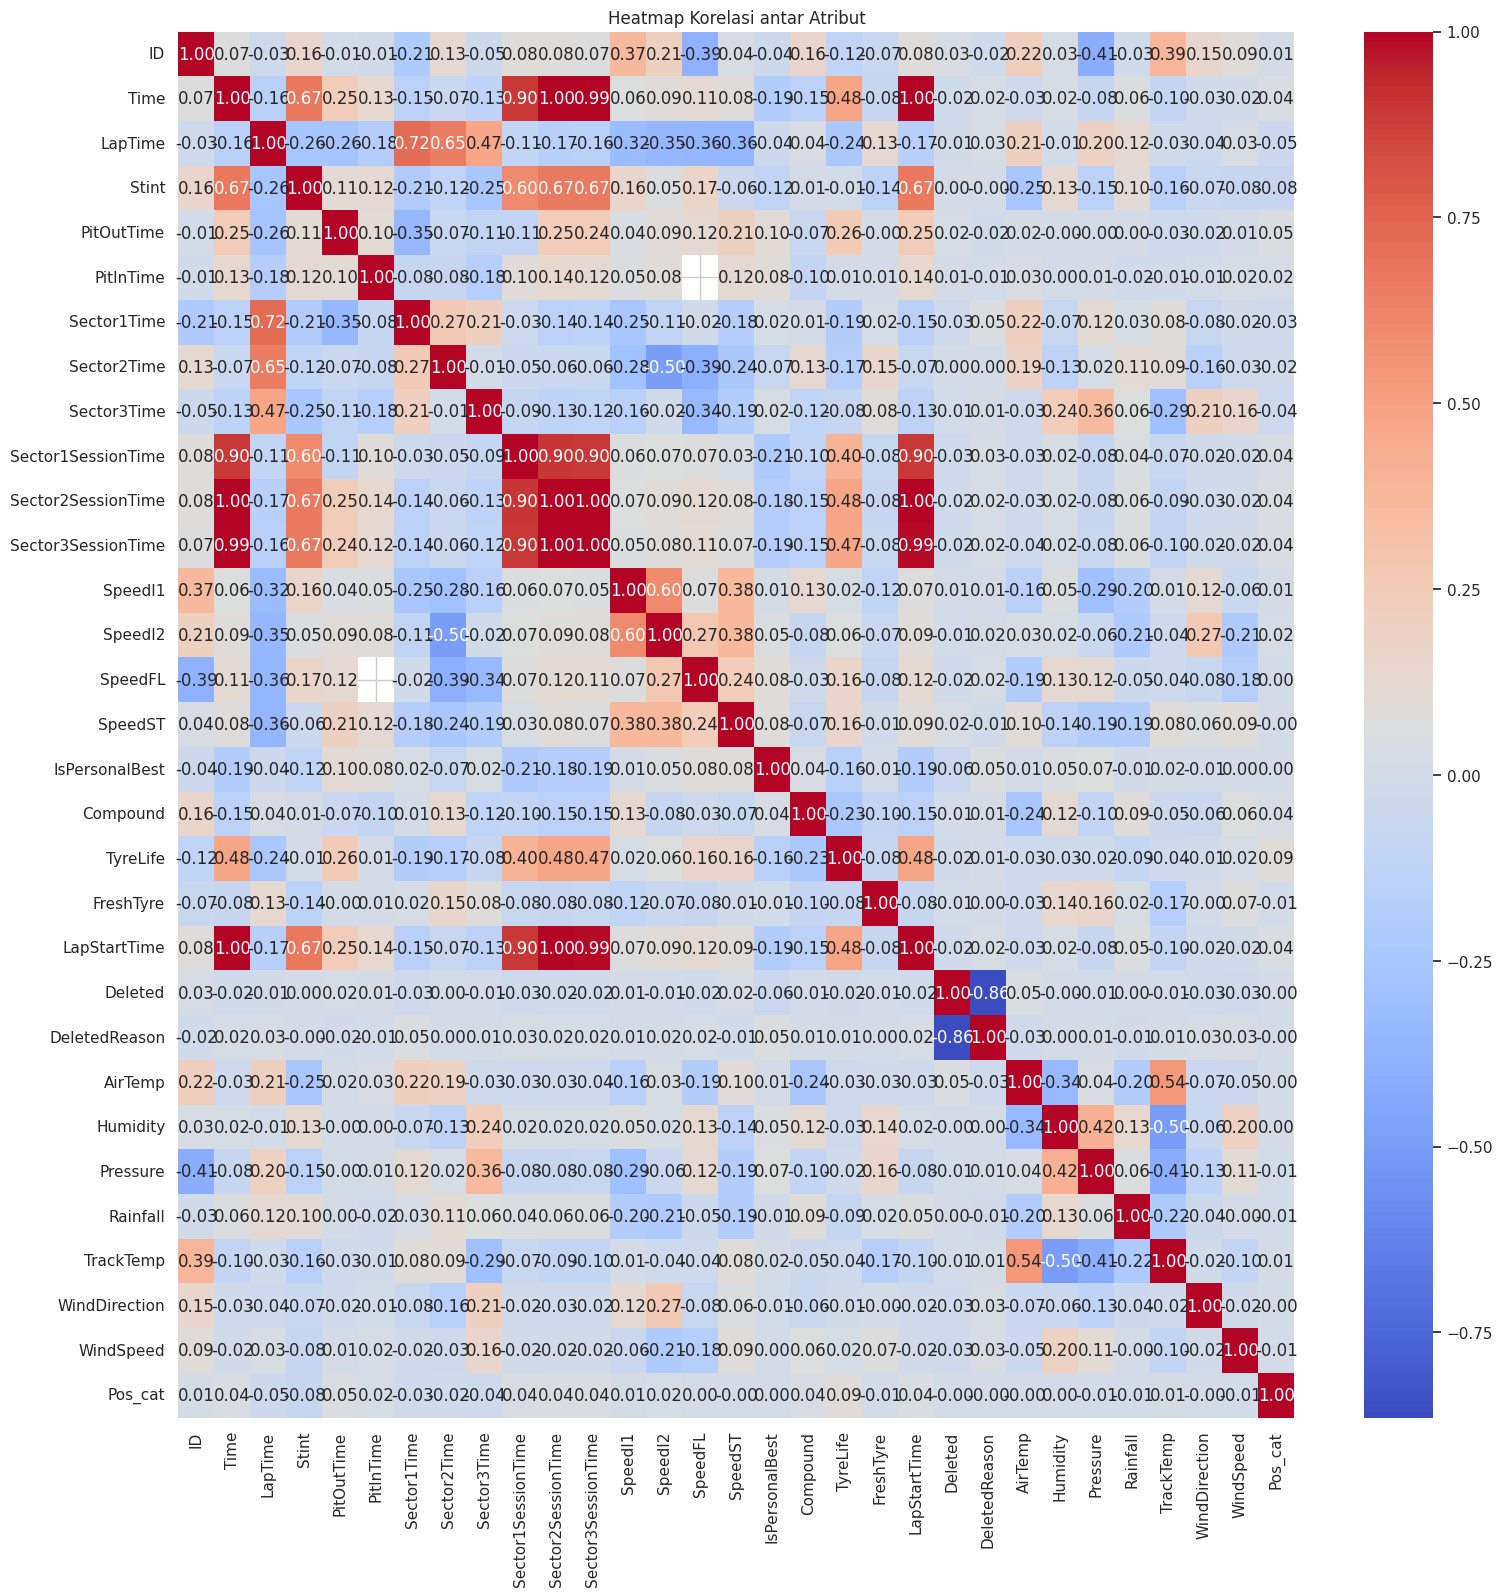

In [ ]:
# Menghitung korelasi antar atribut saat Rainfall
correlation_matrix = df_3.corr()

# Mengatur ukuran gambar
plt.figure(figsize=(18, 18))

# Membuat heatmap dari korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Atribut')
plt.show()

Berdasarkan heatmap diatas, dapat dilihat bahwa korelasi antara setiap variabel terhadap rainfall cukup lemah, hal ini dapatdikatakan bahwa Rainfall tidak berpengaruh signifikan terhadap variabel lain. Namun, rendahnya korelasi linier tidak selalu berarti tidak ada hubungan antara dua variabel.

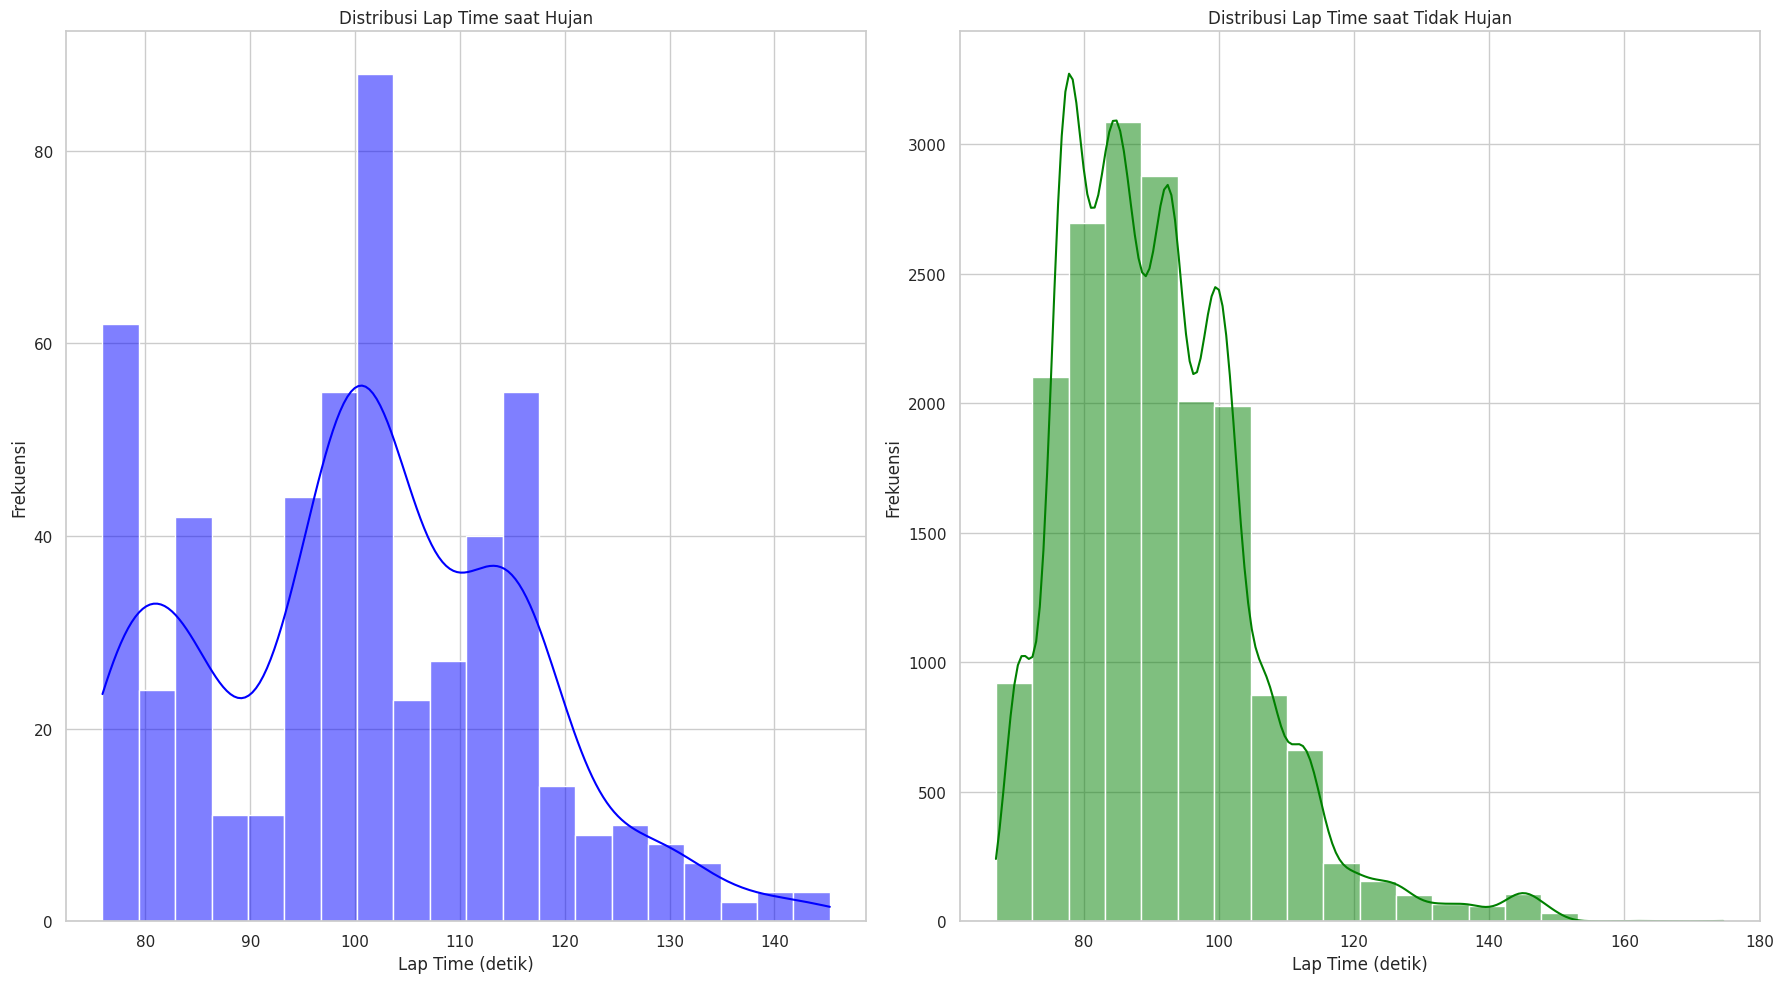

Modus Lap Time saat Hujan: [ 84.932 100.28  100.446 101.277 106.026 116.499]
Rata-rata Lap Time saat Hujan: 100.73363873370577
Modus Lap Time saat Tidak Hujan: [76.993]
Rata-rata Lap Time saat Tidak Hujan: 90.73090278937698


In [ ]:
# Filter data berdasarkan kondisi hujan dan tidak hujan
rainy_laptimes = df[df['Rainfall'] == True]['LapTime']
non_rainy_laptimes = df[df['Rainfall'] == False]['LapTime']

# Plotting histogram
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.histplot(rainy_laptimes, color='blue', kde=True, bins=20)
plt.title('Distribusi Lap Time saat Hujan')
plt.xlabel('Lap Time (detik)')
plt.ylabel('Frekuensi')

# Plotting histogram untuk lap time saat tidak hujan
plt.subplot(1, 2, 2)
sns.histplot(non_rainy_laptimes, color='green', kde=True, bins=20)
plt.title('Distribusi Lap Time saat Tidak Hujan')
plt.xlabel('Lap Time (detik)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

mode_rainy_laptimes = rainy_laptimes.mode().values
mean_rainy_laptimes = rainy_laptimes.mean()

# Menghitung modus dan rata-rata lap time saat tidak hujan
mode_non_rainy_laptimes = non_rainy_laptimes.mode().values
mean_non_rainy_laptimes = non_rainy_laptimes.mean()

print("Modus Lap Time saat Hujan:", mode_rainy_laptimes)
print("Rata-rata Lap Time saat Hujan:", mean_rainy_laptimes)

print("Modus Lap Time saat Tidak Hujan:", mode_non_rainy_laptimes)
print("Rata-rata Lap Time saat Tidak Hujan:", mean_non_rainy_laptimes)

Rainfall :
- Saat Rainfall, pada grafik histogram yang ada disebelah kiri, dapat dilihat bahwa frekuensi tertinggi untuk Lap Time Ada pada rentang 100-105 detik dengan rata rata Lap Time 100 detik

Non Rainfall :    
- Saat Non Rainfall, pada grafik histogram yang ada disebelah kanan, dapat dilihat bahwa frekuensi tertinggi untuk Lap Time Ada pada rentang 85-95 detik dengan rata rata Lap Time 90 detik

Hasil Analisis :    
Berdasarkan analisis diatas, didapat bahwa ada pengaruh antara kondisi Rainfall dan Non Rainfall terhadap Lap Time. Pada kondisi Rainfall, Lap Time yang tercatat cenderung lebih tinggi (lambat) dibanding pada saat Non Rainfall yang cenderung lebih rendah (cepat).
Artinya, driver cenderung memiliki Lap Time yang lebih bagus pada saat kondisi Non Rainfall.

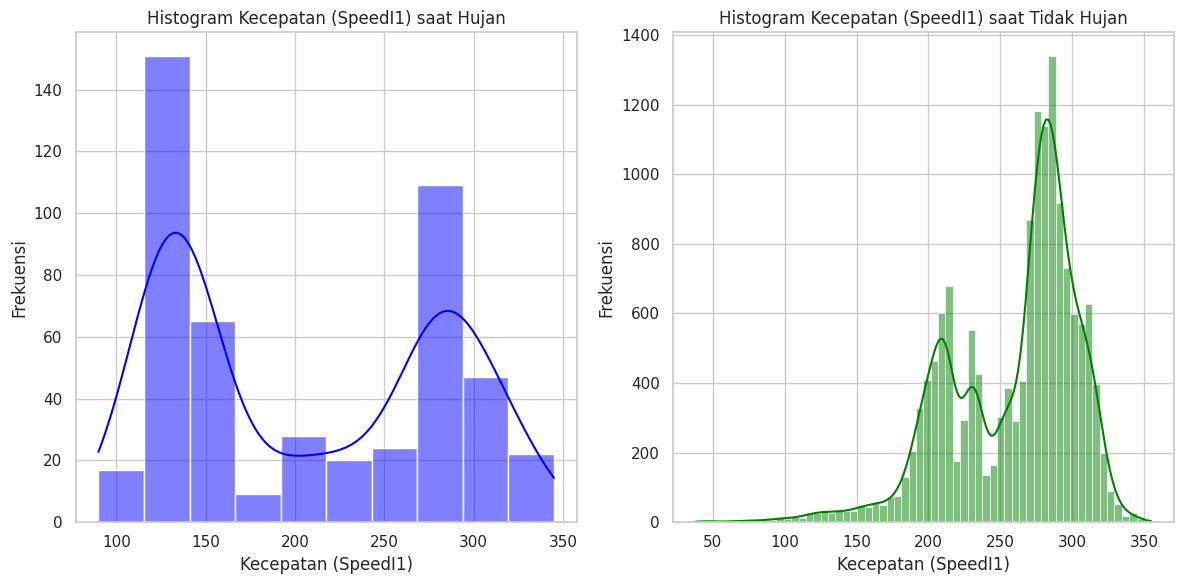

In [ ]:
sns.set(style="whitegrid")

rainy_data = df[df['Rainfall'] == True]
non_rainy_data = df[df['Rainfall'] == False]

plt.figure(figsize=(12, 6))



# Histogram untuk kecepatan saat hujan
plt.subplot(1, 2, 1)
sns.histplot(rainy_data['SpeedI1'], color='blue', kde=True)
plt.title('Histogram Kecepatan (SpeedI1) saat Hujan')
plt.xlabel('Kecepatan (SpeedI1)')
plt.ylabel('Frekuensi')

# Histogram untuk kecepatan saat tidak hujan
plt.subplot(1, 2, 2)
sns.histplot(non_rainy_data['SpeedI1'], color='green', kde=True)
plt.title('Histogram Kecepatan (SpeedI1) saat Tidak Hujan')
plt.xlabel('Kecepatan (SpeedI1)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()

Rainfall :

*   Dari visualisasi histogram tersebut, Histogram di sebelah kiri menunjukkan kecepatan lebih tersebar saat hujan, Kecepatannya berkisar antara 50 hingga 350 mph, dengan kecepatan yang paling sering terjadi antara 150 hingga 250 mph. Terdapat tail yang lebih panjang di sisi kanan histogram, menunjukkan bahwa ada beberapa driver yang bergerak jauh lebih cepat dari rata-rata.
* Pada grafik histogram disebelah kiri,  kecepatan terbanyak berada pada rentang 100 - 150 mph. Berarti dapat dikatakan ketika cuaca hujan, kecepatan driver cenderung lebih rendah.

* Dapat disimpulkan distribusi kecepatan pengemudi cenderung lebih tersebar, dengan kecepatan yang bervariasi dari 50 hingga 350 mph. Ini menunjukkan adanya variasi besar dalam kecepatan pengemudi saat kondisi cuaca buruk.



Not-RainFall :


*   Histogram di sebelah kanan menunjukkan bahwa kecepatan  lebih terkonsentrasi saat tidak hujan. Kecepatannya berkisar antara 100 hingga 300 mph, dengan kecepatan yang paling sering terjadi antara 200 hingga 250 mph.

* Pada grafik histogram disebelah kanan,  kecepatan terbanyak berada pada rentang 250 - 300 mph. Berarti dapat dikatakan ketika cuaca tidak hujan, kecepatan driver cenderung tinggi.


* Di sisi lain, saat tidak hujan, distribusi kecepatan cenderung lebih terkonsentrasi, dengan kecepatan yang berkisar antara 100 hingga 300 mph. Hal ini menandakan bahwa pengemudi cenderung mempertahankan kecepatan yang lebih konsisten saat kondisi cuaca baik.


Berdasarkan hasil tersebut, dapat dikatakan bahwa ada pengaruh ketika kondisi rainfall atau tidak rainfall terhadap kecepatan driver (SpeedI1).



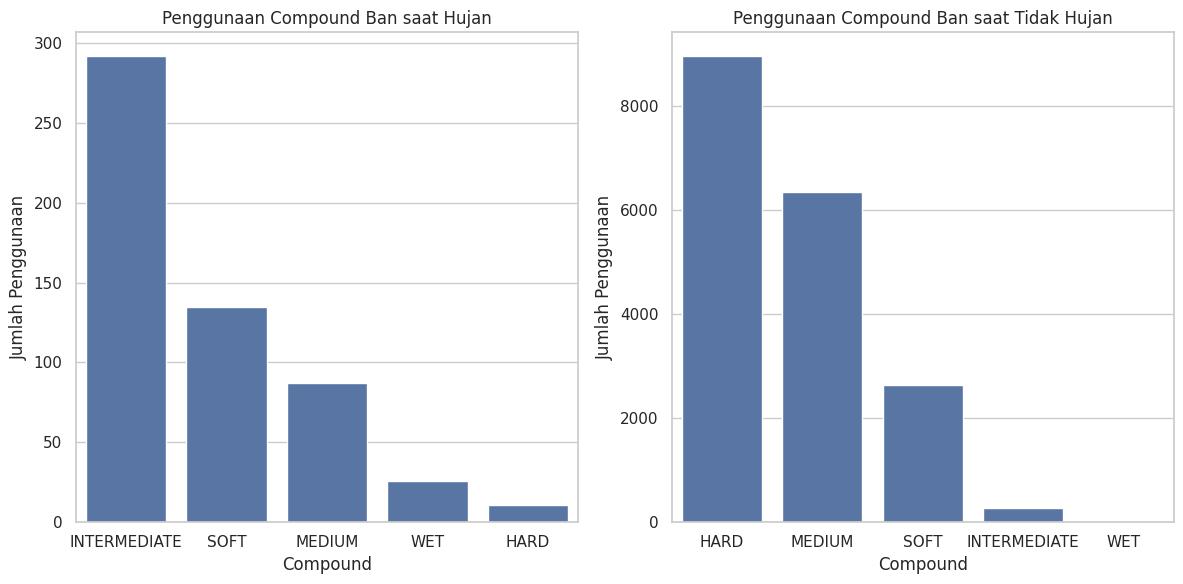

In [ ]:
compound_usage_rainy = df[df['Rainfall'] == True]['Compound'].value_counts()
compound_usage_non_rainy = df[df['Rainfall'] == False]['Compound'].value_counts()

# Plotting bar plot untuk kondisi hujan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=compound_usage_rainy.index, y=compound_usage_rainy.values)
plt.title('Penggunaan Compound Ban saat Hujan')
plt.xlabel('Compound')
plt.ylabel('Jumlah Penggunaan')

# Plotting bar plot untuk kondisi tidak hujan
plt.subplot(1, 2, 2)
sns.barplot(x=compound_usage_non_rainy.index, y=compound_usage_non_rainy.values)
plt.title('Penggunaan Compound Ban saat Tidak Hujan')
plt.xlabel('Compound')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()



*   Berdasarkan hasil visualisasi, terlihat bahwa penggunaan compound ban saat hujan (Rainfall) didominasi oleh jenis intermediate dan soft. Terdapat juga penggunaan compound wet, yang merupakan pilihan yang wajar untuk kondisi basah. Hal ini menunjukkan bahwa dalam kondisi hujan, para pembalap lebih memilih jenis ban yang dapat memberikan cengkeraman lebih baik terhadap lintasan yang licin

*   Di sisi lain, saat tidak hujan atau kondisi tidak rainfall, pola penggunaan compound ban berbeda. Jumlah penggunaan compound wet menurun drastis atau bahkan tidak ada, yang sesuai dengan kondisi cuaca yang kering. Sebaliknya, penggunaan compound ban jenis Hard menjadi dominan, dengan sedikit atau tanpa penggunaan jenis ban lainnya. Ini menunjukkan bahwa pada kondisi cuaca kering, pembalap lebih memilih ban yang lebih tahan lama dan stabil, seperti jenis ban Hard, untuk mendapatkan performa yang optimal di lintasan.



# Data Preprocessing

## Data Cleaning

In [ ]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df)

,Total,Percent
DeletedReason,18477,0.983447
PitInTime,18053,0.960879
PitOutTime,17749,0.944699
SpeedI1,2917,0.155259
SpeedST,1692,0.090057
SpeedFL,775,0.041250
Sector1SessionTime,444,0.023632
Sector1Time,407,0.021663
Sector1TimeSeconds,407,0.021663
LapTimeSeconds,290,0.015435


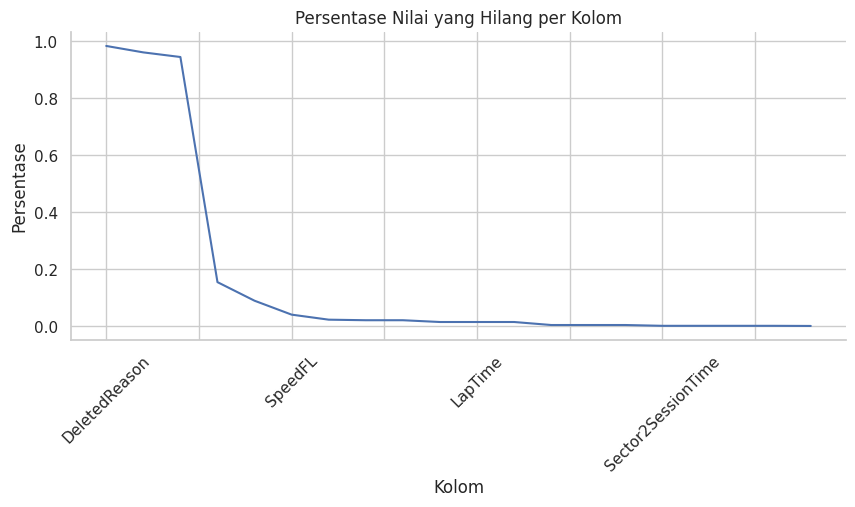

In [ ]:
missing_values_df = cek_missing_values(f1_df)

# Membuat line plot untuk missing value
missing_values_df['Percent'].plot(kind='line', figsize=(10, 4), title='Persentase Nilai yang Hilang per Kolom')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Persentase')
plt.xlabel('Kolom')
plt.xticks(rotation=45)

# Menampilkan line plot
plt.show()


Karena kolom DeletedReason, PitInTime, dan PitOuttime memiliki nilai null dengan persentase terbanyak, kemungkinan besar ketiga kolom tersebut tidak memberikan informasi yang berguna untuk analisis umum performa balapan dan permodelan, kami mengambil keputusan untuk menghapus ketiga kolom ini dari dataset.

In [ ]:
# Menghapus kolom 'PitOutTime', 'PitInTime', dan 'DeletedReason'
f1_df_cleaned = f1_df.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

# Menampilkan kolom yang tersisa untuk memastikan ketiga kolom sebelumnya telah dihapus
f1_df_cleaned.columns

Index(['ID', 'Time', 'LapTime', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime',
       'Deleted', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Pos_cat', 'LapTimeSeconds',
       'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds',
       'IsPodium', 'LapTime_seconds', 'WindSpeed_bin'],
      dtype='object')

In [ ]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df_cleaned)

,Total,Percent
SpeedI1,2917,0.155259
SpeedST,1692,0.090057
SpeedFL,775,0.041250
Sector1SessionTime,444,0.023632
Sector1TimeSeconds,407,0.021663
Sector1Time,407,0.021663
LapTime,290,0.015435
LapTime_seconds,290,0.015435
LapTimeSeconds,290,0.015435
Sector3TimeSeconds,92,0.004897


## Data Conversion

In [ ]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
f1_df_cleaned['LapTimeSeconds'] = pd.to_timedelta(f1_df_cleaned['LapTime']).dt.total_seconds()
f1_df_cleaned['Sector1TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector1Time']).dt.total_seconds()
f1_df_cleaned['Sector2TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector2Time']).dt.total_seconds()
f1_df_cleaned['Sector3TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
f1_df_cleaned



,ID,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,WindDirection,WindSpeed,Pos_cat,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds,IsPodium,LapTime_seconds,WindSpeed_bin
0,14609,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,0 days 02:26:05.905000,0 days 02:26:31.706000,...,157,3.0,Participant,100.943,46.163,28.979,25.801,0,100.943,5
1,3211,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,0 days 01:13:26.395000,0 days 01:13:51.732000,...,275,1.0,Podium,108.067,39.129,43.601,25.337,1,108.067,2
2,2497,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,0 days 02:21:59.704000,0 days 02:22:35.141000,...,0,0.6,Participant,82.881,28.890,18.554,35.437,0,82.881,1
3,13639,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,0 days 01:03:06.412000,0 days 01:03:36.927000,...,135,1.8,Podium,91.585,NaN,28.929,30.478,1,91.585,3
4,1280,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,0 days 01:45:10.048000,0 days 01:45:40.021000,...,271,1.3,Point,94.742,34.895,29.874,29.973,0,94.742,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,12769,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,0 days 01:26:36.962000,0 days 01:27:00.909000,...,252,1.2,Participant,85.235,30.620,30.668,23.947,0,85.235,2
18784,16394,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,0 days 01:21:04.307000,0 days 01:21:32.344000,...,145,1.1,Participant,100.363,29.488,42.838,28.037,0,100.363,2
18785,13600,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,0 days 02:00:01.438000,0 days 02:00:31.707000,...,146,1.1,Participant,112.495,32.659,49.567,30.269,0,112.495,2
18786,11924,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,0 days 01:07:35.926000,0 days 01:07:59.930000,...,134,1.5,Participant,85.938,30.564,31.370,24.004,0,85.938,3


## Data Encoding

In [ ]:
# Menampilkan tipe data kolom dari dataset
f1_df_cleaned.dtypes

ID                      int64
Time                   object
LapTime                object
Stint                 float64
Sector1Time            object
Sector2Time            object
Sector3Time            object
Sector1SessionTime     object
Sector2SessionTime     object
Sector3SessionTime     object
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest         object
Compound               object
TyreLife              float64
FreshTyre                bool
LapStartTime           object
Deleted                  bool
AirTemp               float64
Humidity              float64
Pressure              float64
Rainfall                 bool
TrackTemp             float64
WindDirection           int64
WindSpeed             float64
Pos_cat                object
LapTimeSeconds        float64
Sector1TimeSeconds    float64
Sector2TimeSeconds    float64
Sector3TimeSeconds    float64
IsPodium                int64
LapTime_se

In [ ]:
# Menampilkan nilai unik dari kolom 'Compound' untuk mengidentifikasi variasi compound ban yang digunakan
print(f1_df_cleaned['Compound'].unique())

# Menampilkan nilai unik dari kolom 'Pos_cat' untuk melihat kategori posisi finish yang berbeda dalam dataset
print(f1_df_cleaned['Pos_cat'].unique())

# Menampilkan nilai unik dari kolom 'Rainfall' untuk melihat kategori kondisi hujan yang berbeda dalam dataset
print(f1_df_cleaned['Rainfall'].unique())

['INTERMEDIATE' 'MEDIUM' 'HARD' 'SOFT' 'WET']
['Participant' 'Podium' 'Point']
[False  True]


In [ ]:
# Membuat instance dari LabelEncoder
le_compound = LabelEncoder()
le_pos_cat = LabelEncoder()
le_rainfall = LabelEncoder()

# Melakukan fit dan transform pada kolom 'Compound' dan mengganti kolom tersebut dengan hasilnya
f1_df_cleaned['Compound_encoded'] = le_compound.fit_transform(f1_df_cleaned['Compound'])

# Melakukan hal yang sama untuk 'Pos_cat'
f1_df_cleaned['Pos_cat_encoded'] = le_pos_cat.fit_transform(f1_df_cleaned['Pos_cat'])

# Melakukan hal yang sama untuk 'Rainfall'
f1_df_cleaned['Rainfall_encoded'] = le_rainfall.fit_transform(f1_df_cleaned['Rainfall'])

# Menampilkan beberapa baris pertama untuk memeriksa hasilnya
print(f1_df_cleaned[['Compound', 'Compound_encoded', 'Pos_cat', 'Pos_cat_encoded', 'Rainfall_encoded', 'Rainfall']].head())

       Compound  Compound_encoded      Pos_cat  Pos_cat_encoded  \
0  INTERMEDIATE                 1  Participant                0   
1        MEDIUM                 2       Podium                1   
2          HARD                 0  Participant                0   
3          SOFT                 3       Podium                1   
4          HARD                 0        Point                2   

   Rainfall_encoded  Rainfall  
0                 0     False  
1                 0     False  
2                 0     False  
3                 0     False  
4                 0     False  


# Data Modelling

**Problem Guide:**

Buatlah beberapa model yang mungkin akan diperlukan, diantaranya: (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat):

**Pertanyaan:**
1. Buatlah model untuk mengklasifikasi kategori posisi ‘Pos_cat’.
2. Buatlah model untuk memprediksi umur ban ‘TyreLife’ pada suatu lap session.
3. Lakukan clustering pada dataset, dan berikan analisis dari cluster yang terbentuk!

## Nomor 1

1. Buatlah model untuk mengklasifikasi kategori posisi ‘Pos_cat’.

### (Bintang) Implementasi Model Klasifikasi Kategori posisi 'Pos_cat' dengan Random forest dan melakukan sampling SMOTE

In [ ]:
train_data_clas = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")
test_data_clas = pd.read_csv('f1_test_classif.csv')


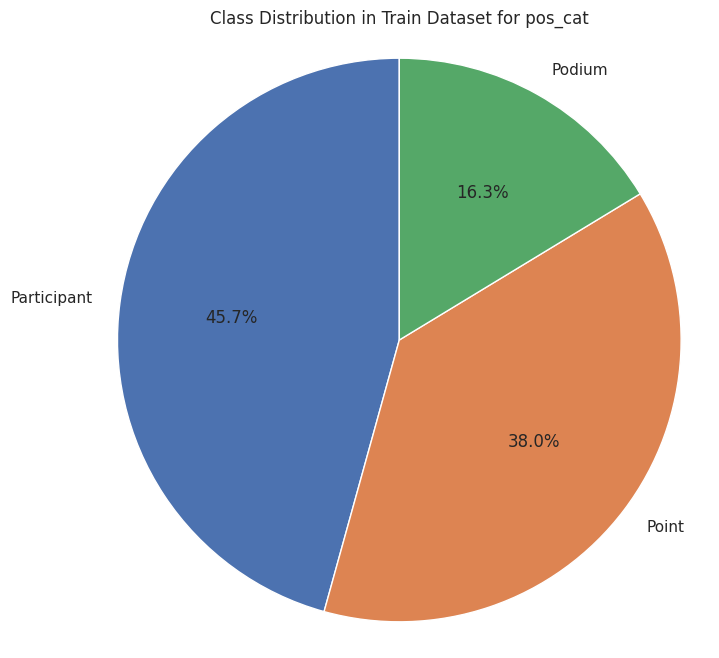

In [ ]:
class_counts = train_data_clas['Pos_cat'].value_counts()

# Plotting the pie chart for the class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Train Dataset for pos_cat')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
train_data_cleaned_clas = train_data_clas.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])
test_data_cleaned_clas = test_data_clas.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

# Drop rows with missing 'Pos_cat'
print("Columns before dropping NA for Pos_cat:", train_data_cleaned_clas.columns)
train_data_clas = train_data_cleaned_clas.dropna(subset=['Pos_cat'])

Columns before dropping NA for Pos_cat: Index(['ID', 'Time', 'LapTime', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime',
       'Deleted', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Pos_cat'],
      dtype='object')


In [ ]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
train_data_clas['LapTimeSeconds'] = pd.to_timedelta(train_data_clas['LapTime']).dt.total_seconds()
train_data_clas['Sector1TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector1Time']).dt.total_seconds()
train_data_clas['Sector2TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector2Time']).dt.total_seconds()
train_data_clas['Sector3TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
train_data_clas

# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
test_data_cleaned_clas['LapTimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['LapTime']).dt.total_seconds()
test_data_cleaned_clas['Sector1TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector1Time']).dt.total_seconds()
test_data_cleaned_clas['Sector2TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector2Time']).dt.total_seconds()
test_data_cleaned_clas['Sector3TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
test_data_cleaned_clas




,ID,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds
0,11652,0 days 01:19:09.993000,0 days 00:01:25.001000,1.0,0 days 00:00:30.631000,0 days 00:00:30.430000,0 days 00:00:23.940000,0 days 01:18:15.630000,0 days 01:18:46.060000,0 days 01:19:10,...,32.0,988.4,False,49.6,155,1.2,85.001,30.631,30.430,23.940
1,4732,0 days 01:46:56.673000,0 days 00:01:32.378000,2.0,0 days 00:00:31.596000,0 days 00:00:34.849000,0 days 00:00:25.933000,0 days 01:45:55.886000,0 days 01:46:30.735000,0 days 01:46:56.668000,...,58.0,1018.2,False,38.5,142,4.3,92.378,31.596,34.849,25.933
2,89,0 days 01:58:13.959000,0 days 00:01:37.974000,3.0,0 days 00:00:30.942000,0 days 00:00:42.828000,0 days 00:00:24.204000,0 days 01:57:06.877000,0 days 01:57:49.705000,0 days 01:58:13.909000,...,21.0,1017.0,False,29.6,212,0.6,97.974,30.942,42.828,24.204
3,7071,0 days 02:22:04.017000,0 days 00:01:18.870000,3.0,0 days 00:00:23.305000,0 days 00:00:31.779000,0 days 00:00:23.786000,0 days 02:21:08.423000,0 days 02:21:40.202000,0 days 02:22:03.988000,...,67.0,1001.4,False,28.2,36,1.7,78.870,23.305,31.779,23.786
4,15110,0 days 02:00:18.410000,0 days 00:01:25.884000,2.0,0 days 00:00:28.196000,0 days 00:00:29.713000,0 days 00:00:27.975000,0 days 01:59:20.701000,0 days 01:59:50.414000,0 days 02:00:18.389000,...,39.0,1000.2,False,43.4,153,1.7,85.884,28.196,29.713,27.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,22158,0 days 01:57:44.512000,0 days 00:01:17.043000,3.0,0 days 00:00:19.964000,0 days 00:00:39.353000,0 days 00:00:17.726000,0 days 01:56:48.570000,0 days 01:57:27.923000,0 days 01:57:45.649000,...,59.0,927.7,False,48.3,189,2.2,77.043,19.964,39.353,17.726
2345,9217,0 days 02:01:14.348000,0 days 00:01:17.355000,3.0,0 days 00:00:21.716000,0 days 00:00:24.777000,0 days 00:00:30.862000,0 days 02:00:18.674000,0 days 02:00:43.451000,0 days 02:01:14.313000,...,61.0,1011.4,False,31.7,314,1.8,77.355,21.716,24.777,30.862
2346,16577,0 days 01:16:20.505000,0 days 00:01:40.339000,1.0,0 days 00:00:29.114000,0 days 00:00:42.991000,0 days 00:00:28.234000,0 days 01:15:09.320000,0 days 01:15:52.311000,0 days 01:16:20.545000,...,72.0,1008.9,False,36.5,161,1.7,100.339,29.114,42.991,28.234
2347,19202,0 days 02:38:25.861000,0 days 00:01:40.794000,3.0,0 days 00:00:26.874000,0 days 00:00:40.382000,0 days 00:00:33.538000,0 days 02:37:11.926000,0 days 02:37:52.308000,0 days 02:38:25.846000,...,41.0,992.7,False,40.2,104,3.4,100.794,26.874,40.382,33.538


In [ ]:
numeric_clas = train_data_clas.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'WindDirection', 'WindSpeed', 'AirTemp'])
categorical_clas = ['Rainfall', 'Compound']

In [ ]:
poly_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly_transformer, numeric_clas),
        ('cat', categorical_transformer, categorical_clas)
    ])

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline


X = train_data_clas.drop(['ID', 'Pos_cat', 'Deleted'], axis=1)
y = train_data_clas['Pos_cat']


X_train, X_valid, y_train, y_layout = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


rf_clas_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', BorderlineSMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(max_depth=25, n_estimators=250, max_features='sqrt', random_state=42))
])

rf_clas_model.fit(X_train, y_train)

y_pred = rf_clas_model.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_clas_model.predict(X_valid)

# Mencetak metrik
print("Accuracy:", accuracy_score(y_layout, y_pred))
print("Classification Report:")
print(classification_report(y_layout, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_layout, y_pred))

Accuracy: 0.8084087280468334
Classification Report:
              precision    recall  f1-score   support

 Participant       0.86      0.87      0.87      1718
      Podium       0.77      0.76      0.76       613
       Point       0.76      0.76      0.76      1427

    accuracy                           0.81      3758
   macro avg       0.80      0.80      0.80      3758
weighted avg       0.81      0.81      0.81      3758

Confusion Matrix:
[[1487   13  218]
 [  19  466  128]
 [ 214  128 1085]]


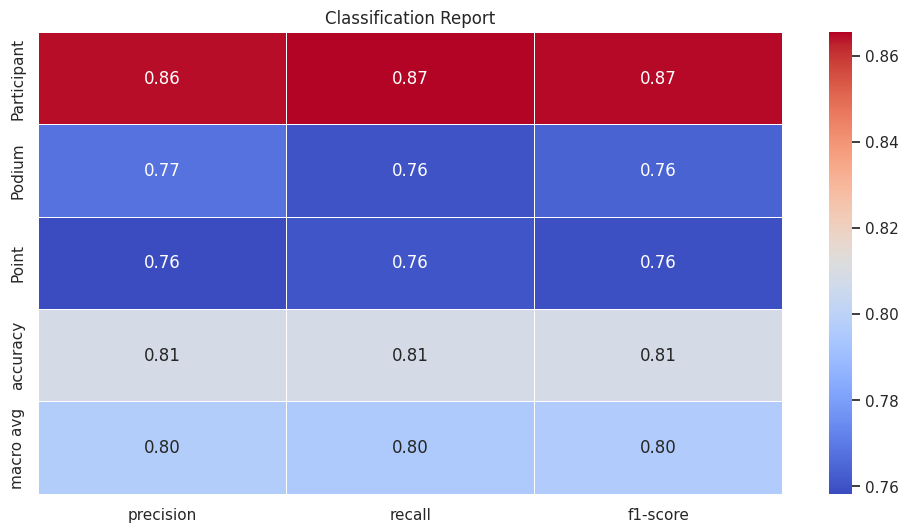

Accuracy: 0.8084087280468334
Class 'Participant': Precision: 0.8645, Recall: 0.8655, F1-score: 0.8650
Class 'Podium': Precision: 0.7677, Recall: 0.7602, F1-score: 0.7639
Class 'Point': Precision: 0.7582, Recall: 0.7603, F1-score: 0.7593
Macro Average Precision: 0.7968, Recall: 0.7954, F1-score: 0.7961
Weighted Average Precision: 0.8084, Recall: 0.8084, F1-score: 0.8084


In [ ]:
# Contoh dari hasil prediksi dan data sebenarnya, asumsikan y_layout adalah y_valid
y_pred = rf_clas_model.predict(X_valid)
report = classification_report(y_layout, y_pred, output_dict=True)

# Membuat DataFrame dari laporan klasifikasi
report_df = pd.DataFrame(report).transpose()

# Membuat heatmap dari DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)  # iloc untuk menghindari baris dan kolom support/average total
plt.title("Classification Report")
plt.show()

print(f"Accuracy:", accuracy_score(y_layout, y_pred))  # Menampilkan dengan 4 angka di belakang koma

# Menampilkan Precision, Recall, dan F1-score untuk setiap kelas
for label in report:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report[label]['precision']
        recall = report[label]['recall']
        f1_score = report[label]['f1-score']
        print(f"Class '{label}': Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")

# Menampilkan nilai macro average dan weighted average jika diperlukan
macro_avg = report['macro avg']
weighted_avg = report['weighted avg']
print(f"Macro Average Precision: {macro_avg['precision']:.4f}, Recall: {macro_avg['recall']:.4f}, F1-score: {macro_avg['f1-score']:.4f}")
print(f"Weighted Average Precision: {weighted_avg['precision']:.4f}, Recall: {weighted_avg['recall']:.4f}, F1-score: {weighted_avg['f1-score']:.4f}")

In [ ]:
# Check the number of rows before predictions
print("Number of rows in the test dataset for predictions:", len(test_data_cleaned_clas))
print("Number of rows in the original test dataset:", len(test_data_clas))

# Prepare data for predictions
X_test_clas = test_data_cleaned_clas.drop(['ID'], axis=1)

# Generate predictions
predictions_clas = rf_clas_model.predict(X_test_clas)

# Check if the number of predictions matches the expected number of IDs
if len(predictions_clas) == len(test_data_clas['ID']):
    submission = pd.DataFrame({'ID': test_data_clas['ID'], 'Pos_cat': predictions_clas})
    submission.to_csv('submission_classification_tk.csv', index=False)
    print("Submission file created successfully.")
else:
    print("Error: Mismatch in the number of predictions and number of IDs.")
    print("Number of predictions:", len(predictions_clas))
    print("Number of IDs:", len(test_data_clas['ID']))

Number of rows in the test dataset for predictions: 2349
Number of rows in the original test dataset: 2349
Submission file created successfully.


## Nomor 2

###(Bintang) Implementasi Model Random Forest Regressor untuk memprediksi umur TyreLife, menggunakan pipeline dan column transformer

In [ ]:
train_data = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")
test_data = pd.read_csv('f1_test_reg.csv')


train_data.head(), test_data.head()

(      ID                    Time                 LapTime  Stint  \
 0  14609  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
 1   3211  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
 2   2497  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
 3  13639  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
 4   1280  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   
 
                PitOutTime PitInTime             Sector1Time  \
 0  0 days 02:25:08.325000       NaN  0 days 00:00:46.163000   
 1                     NaN       NaN  0 days 00:00:39.129000   
 2                     NaN       NaN  0 days 00:00:28.890000   
 3  0 days 00:14:44.885000       NaN                     NaN   
 4                     NaN       NaN  0 days 00:00:34.895000   
 
               Sector2Time             Sector3Time      Sector1SessionTime  \
 0  0 days 00:00:28.979000  0 days 00:00:25.801000  0 days 02:25:36.926000   
 1  0 days 00:00:43.601000  0 days 00:00:25.3370

In [ ]:

train_data_cleaned = train_data.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason', 'Deleted', 'IsPersonalBest', 'Pos_cat'])
train_data = train_data_cleaned.dropna(subset=['TyreLife'])

test_data_cleaned = test_data.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason', 'Deleted', 'IsPersonalBest', 'Pos_cat'])

In [ ]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
train_data['LapTimeSeconds'] = pd.to_timedelta(train_data['LapTime']).dt.total_seconds()
train_data['Sector1TimeSeconds'] = pd.to_timedelta(train_data['Sector1Time']).dt.total_seconds()
train_data['Sector2TimeSeconds'] = pd.to_timedelta(train_data['Sector2Time']).dt.total_seconds()
train_data['Sector3TimeSeconds'] = pd.to_timedelta(train_data['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
train_data

# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
test_data_cleaned['LapTimeSeconds'] = pd.to_timedelta(test_data_cleaned['LapTime']).dt.total_seconds()
test_data_cleaned['Sector1TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector1Time']).dt.total_seconds()
test_data_cleaned['Sector2TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector2Time']).dt.total_seconds()
test_data_cleaned['Sector3TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
test_data_cleaned

,ID,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds
0,16980,0 days 01:13:05.610000,0 days 00:01:42.673000,1.0,0 days 00:00:29.320000,0 days 00:00:43.586000,0 days 00:00:29.767000,0 days 01:11:52.250000,0 days 01:12:35.836000,0 days 01:13:05.603000,...,71.0,1008.9,False,36.7,172,1.7,102.673,29.320,43.586,29.767
1,8169,0 days 01:46:13.022000,0 days 00:01:17.113000,2.0,0 days 00:00:21.491000,0 days 00:00:24.583000,0 days 00:00:31.039000,0 days 01:45:17.414000,0 days 01:45:41.997000,0 days 01:46:13.036000,...,63.0,1011.2,False,29.5,306,1.6,77.113,21.491,24.583,31.039
2,22244,0 days 02:18:16.320000,0 days 00:01:16.644000,4.0,0 days 00:00:19.652000,0 days 00:00:39.275000,0 days 00:00:17.717000,0 days 02:17:20.265000,0 days 02:17:59.540000,0 days 02:18:17.257000,...,59.0,927.7,False,47.5,191,1.7,76.644,19.652,39.275,17.717
3,9083,0 days 01:48:03.485000,0 days 00:01:18.308000,2.0,0 days 00:00:22.075000,0 days 00:00:25.041000,0 days 00:00:31.192000,0 days 01:47:07.256000,0 days 01:47:32.297000,0 days 01:48:03.489000,...,64.0,1011.4,False,30.5,332,1.6,78.308,22.075,25.041,31.192
4,6420,0 days 01:49:13.009000,0 days 00:01:17.111000,1.0,0 days 00:00:20.027000,0 days 00:00:36.406000,0 days 00:00:20.678000,0 days 01:48:15.928000,0 days 01:48:52.334000,0 days 01:49:13.012000,...,41.0,1013.4,False,37.9,154,1.6,77.111,20.027,36.406,20.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,973,0 days 02:17:57.486000,0 days 00:01:37.316000,3.0,0 days 00:00:30.892000,0 days 00:00:42.590000,0 days 00:00:23.834000,0 days 02:16:51.017000,0 days 02:17:33.607000,0 days 02:17:57.441000,...,21.0,1017.0,False,29.1,0,0.5,97.316,30.892,42.590,23.834
2344,16215,0 days 01:34:34.787000,0 days 00:01:40.236000,1.0,0 days 00:00:29.177000,0 days 00:00:42.503000,0 days 00:00:28.556000,0 days 01:33:23.737000,0 days 01:34:06.240000,0 days 01:34:34.796000,...,73.0,1009.0,False,36.3,187,1.1,100.236,29.177,42.503,28.556
2345,161,0 days 02:22:11.918000,0 days 00:01:36.859000,3.0,0 days 00:00:31.010000,0 days 00:00:42.316000,0 days 00:00:23.533000,0 days 02:21:06.035000,0 days 02:21:48.351000,0 days 02:22:11.884000,...,21.0,1017.2,False,29.0,297,0.0,96.859,31.010,42.316,23.533
2346,7997,0 days 02:34:47.867000,0 days 00:01:16.169000,3.0,0 days 00:00:21.134000,0 days 00:00:24.243000,0 days 00:00:30.792000,0 days 02:33:52.832000,0 days 02:34:17.075000,0 days 02:34:47.867000,...,62.0,1012.0,False,29.3,333,1.6,76.169,21.134,24.243,30.792


In [ ]:
numeric = train_data.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'TyreLife', 'WindDirection', 'WindSpeed'])
categorical = ['Rainfall', 'Compound']



In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

poly_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', poly_transformer, numeric),
    ('cat', categorical_transformer, categorical)
])

In [ ]:
from sklearn.linear_model import LinearRegression
X= train_data.drop(['ID', 'TyreLife'], axis=1)
y= train_data['TyreLife']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100))
])
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'Humidity', 'Pressure', 'TrackTemp', 'LapTimeSeconds',
       'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Rainfall', 'Compound'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = rf_model.predict(X_valid)

# Menghitung R-squared
r_squared = r2_score(y_valid, y_pred)
print(f'R-squared: {r_squared}')

# Menghitung MSE dan RMSE
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

actual_vs_predicted = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
print(actual_vs_predicted.head(10))

R-squared: 0.8719793070236216
MSE: 13.497512188242212
RMSE: 3.673896050277173
       Actual  Predicted
5709     38.0      27.31
18517    18.0      16.23
4245     27.0      26.41
14099    52.0      45.12
5005     20.0      21.23
795      33.0      36.03
5928     29.0      26.34
7047     17.0      17.32
6095      9.0       9.69
1419     32.0      32.64


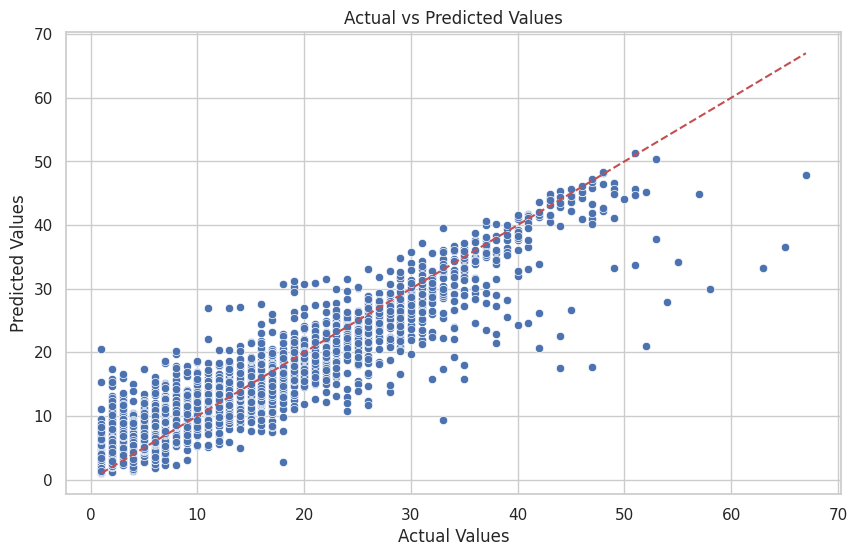

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsikan y_valid dan y_pred sudah ada
# Membuat DataFrame dari nilai aktual dan prediksi
data = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': y_pred
})

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=data)

# Plotting line of perfect prediction
plt.plot([data['Actual'].min(), data['Actual'].max()], [data['Actual'].min(), data['Actual'].max()], 'r--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Nomor 3

### Lakukan clustering pada dataset, dan berikan analisis dari cluster yang terbentuk! (Bintang)

####Pemilihan Fitur

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

f1_df_imputed = f1_df_cleaned.copy()

# Pengimputan untuk kolom numerik
numeric_columns = f1_df_imputed.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='median')
f1_df_imputed[numeric_columns] = numeric_imputer.fit_transform(f1_df_imputed[numeric_columns])

categorical_columns = f1_df_imputed.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
f1_df_imputed[categorical_columns] = categorical_imputer.fit_transform(f1_df_imputed[categorical_columns])

print(f1_df_imputed.head())

selected_features = [
    'LapTimeSeconds',
    'Compound_encoded',
    'Sector1TimeSeconds',
    'Sector2TimeSeconds',
    'Sector3TimeSeconds',
    'Pos_cat_encoded',
]

selected_data = f1_df_imputed[selected_features]



        ID                    Time                 LapTime  Stint  \
0  14609.0  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1   3211.0  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2   2497.0  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3  13639.0  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4   1280.0  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   

              Sector1Time             Sector2Time             Sector3Time  \
0  0 days 00:00:46.163000  0 days 00:00:28.979000  0 days 00:00:25.801000   
1  0 days 00:00:39.129000  0 days 00:00:43.601000  0 days 00:00:25.337000   
2  0 days 00:00:28.890000  0 days 00:00:18.554000  0 days 00:00:35.437000   
3  0 days 00:00:28.315000  0 days 00:00:28.929000  0 days 00:00:30.478000   
4  0 days 00:00:34.895000  0 days 00:00:29.874000  0 days 00:00:29.973000   

       Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0  0 days 02:25:36.926000  0 days 02:26:05.90

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

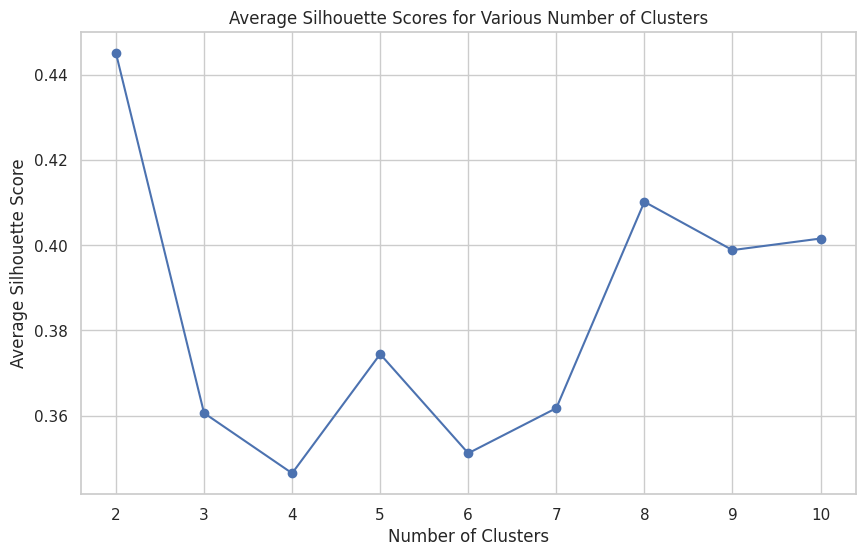

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tentukan rentang jumlah cluster yang akan dievaluasi
range_n_clusters = list(range(2, 11))  # Misalnya, dari 2 hingga 10 cluster

# Inisialisasi list untuk menyimpan skor silhouette
silhouette_scores = []

# Loop melalui setiap jumlah cluster dan hitung skor silhouette
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_data)
    silhouette_avg = silhouette_score(selected_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot skor silhouette terhadap jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Average Silhouette Scores for Various Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

Berdasarkan visualisasi Silhouette Score, kita dapat menganalisis pemilihan jumlah cluster yang optimal. Dalam konteks ini, kita mencari nilai Silhouette Score yang relatif tinggi, karena nilai yang lebih tinggi menunjukkan bahwa objek-objek dalam cluster tersebut lebih mirip satu sama lain dibandingkan dengan objek di cluster lain.

- Skor Silhouette tertinggi terlihat pada jumlah cluster 2, dengan skor sekitar 0.44.
- Jumlah cluster 8 juga menunjukkan peningkatan skor yang signifikan, mendekati 0.40.
Dari grafik tersebut, pilihan jumlah cluster yang optimal bisa dipertimbangkan sebagai berikut:

2 clusters: Memiliki Silhouette Score tertinggi. Ini menunjukkan bahwa dua cluster memberikan pemisahan yang sangat baik di antara data.
8 clusters: Memiliki skor yang mendekati yang terbaik, namun lebih rendah dari 2 cluster.

####Visualisasi elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

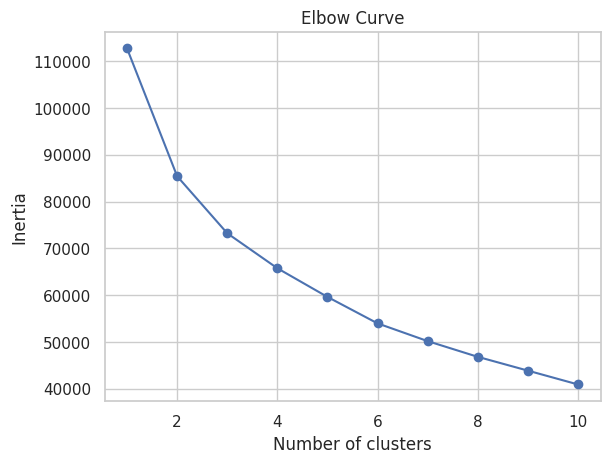

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Inisialisasi list untuk menyimpan inersia
inertia = []

# Jumlah cluster yang akan diuji
clusters_range = range(1, 11)

# Proses clustering untuk setiap jumlah cluster
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


Dari Elbow Curve, dapat dilihat bahwa penurunan inertia yang signifikan terjadi hingga 3 cluster, setelah itu penurunannya mulai melandai. Jadi, titik "siku" yang paling jelas tampak pada 3 cluster.

Perbandingan:

Elbow Curve menunjukkan bahwa 3 cluster adalah pilihan yang baik karena setelah itu penurunan inertia melandai.
Silhouette Score menunjukkan skor tertinggi pada 2 cluster, tetapi kita juga harus memperhatikan bahwa 2 cluster mungkin tidak menangkap cukup variasi dalam data jika hanya ada 2 grup besar. Skor siluet yang cukup baik terlihat lagi pada 8 cluster, namun nilai ini tidak jauh lebih baik dari nilai pada 3 cluster.

Sehingga kita memutusukan menggunakan 8 cluster untuk analsiis yang lebih kompleks

In [ ]:
selected_data

,LapTimeSeconds,Compound_encoded,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds,Pos_cat_encoded
0,100.943,1.0,46.163,28.979,25.801,0.0
1,108.067,2.0,39.129,43.601,25.337,1.0
2,82.881,0.0,28.890,18.554,35.437,0.0
3,91.585,3.0,29.103,28.929,30.478,1.0
4,94.742,0.0,34.895,29.874,29.973,2.0
...,...,...,...,...,...,...
18783,85.235,0.0,30.620,30.668,23.947,0.0
18784,100.363,2.0,29.488,42.838,28.037,0.0
18785,112.495,3.0,32.659,49.567,30.269,0.0
18786,85.938,0.0,30.564,31.370,24.004,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-157-ff887efcc8a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cluster'] = clusters


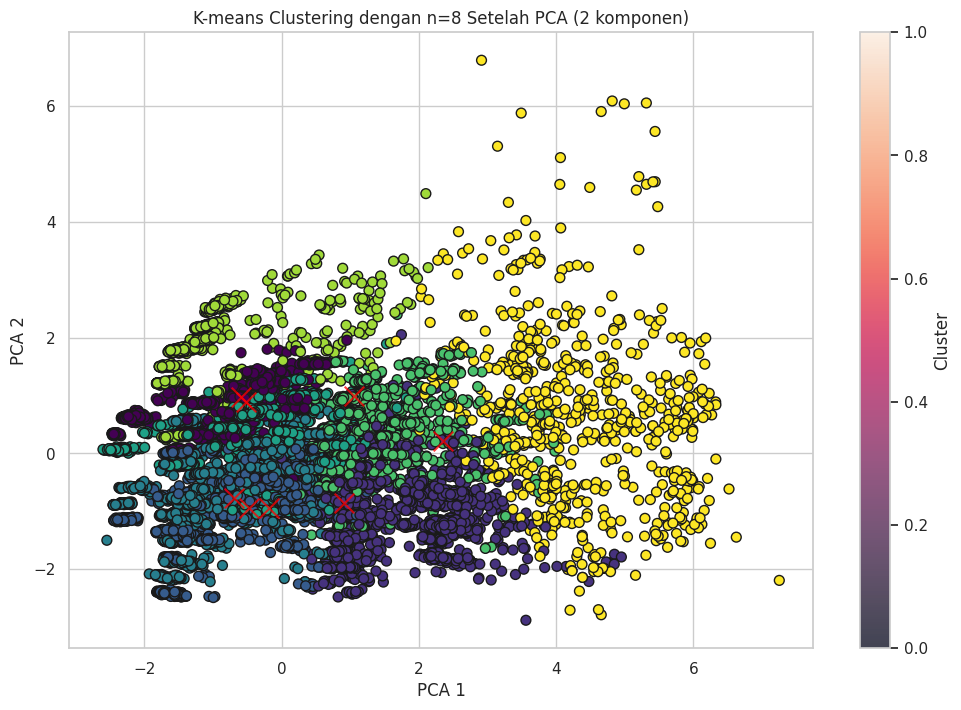

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Reduksi dimensi dengan PCA (2 komponen)
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(scaled_data)

# Reduksi dimensi dengan PCA (3 komponen)
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(scaled_data)

# Clustering dengan K-means
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Menambahkan hasil cluster ke data asli
selected_data['Cluster'] = clusters

# Visualisasi hasil clustering (2D PCA)
plt.figure(figsize=(12, 8))
plt.scatter(pca_result_2[:, 0], pca_result_2[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
centers_2 = kmeans.cluster_centers_[:, :2]  # Centroid for 2D plot
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering dengan n=8 Setelah PCA (2 komponen)')
plt.colorbar(label='Cluster')
plt.show()


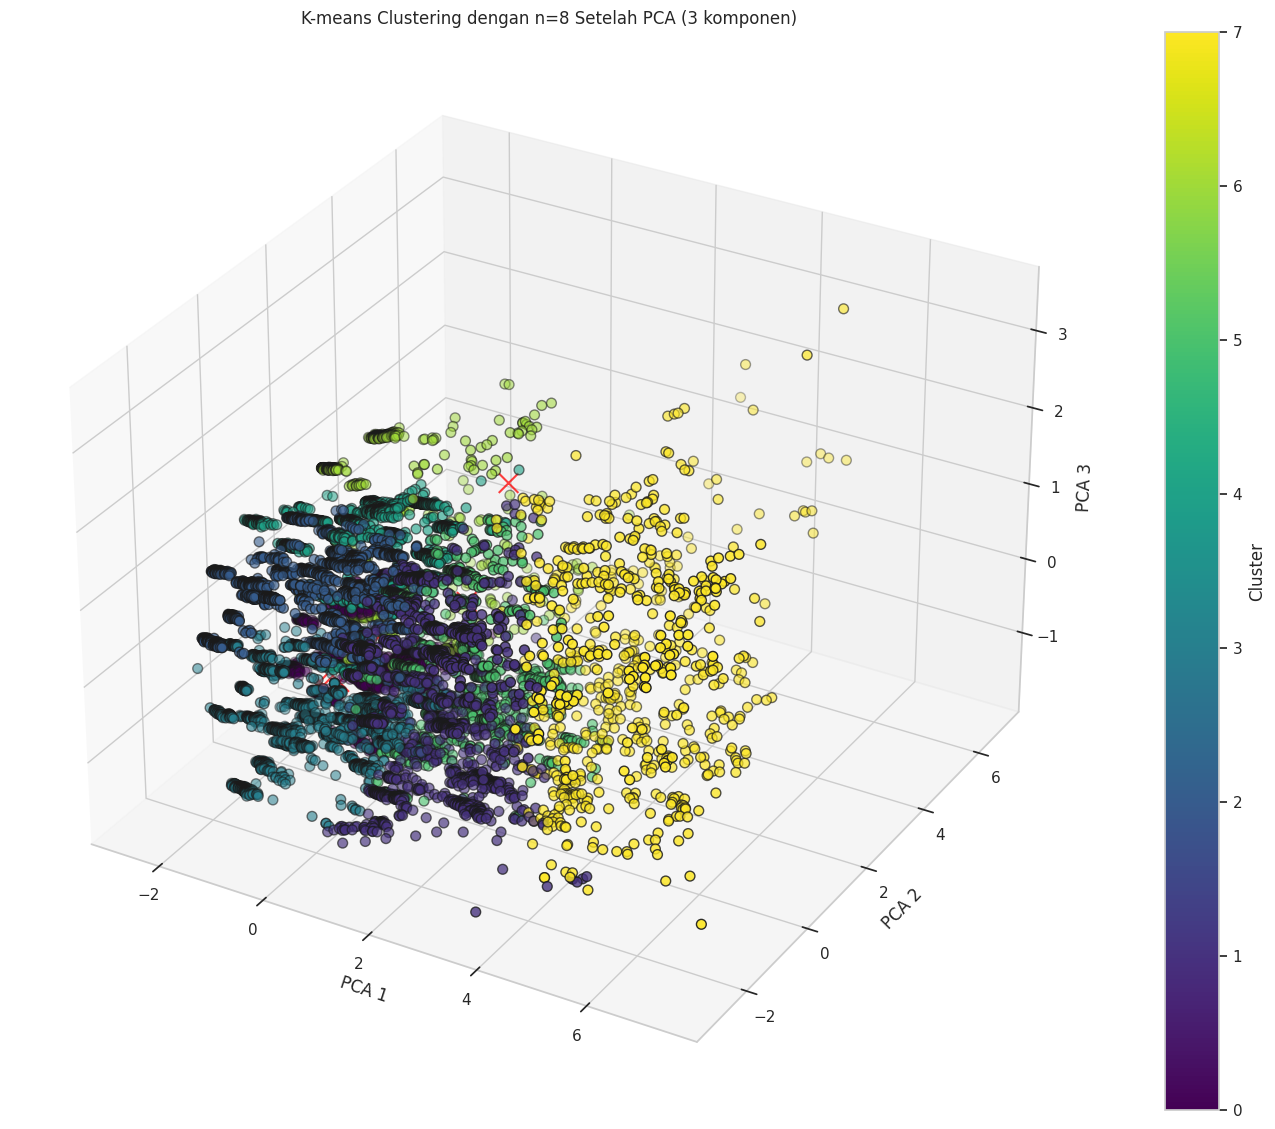

In [ ]:

# Visualisasi hasil clustering (3D PCA)
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_result_3[:, 0], pca_result_3[:, 1], pca_result_3[:, 2], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
centers_3 = kmeans.cluster_centers_[:, :3]  # Centroid for 3D plot
ax.scatter(centers_3[:, 0], centers_3[:, 1], centers_3[:, 2], c='red', s=200, alpha=0.75, marker='x')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('K-means Clustering dengan n=8 Setelah PCA (3 komponen)')
plt.colorbar(sc, label='Cluster')
plt.show()

In [ ]:
# Menghitung total untuk masing-masing cluster
cluster_counts = selected_data['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Jika ingin menampilkan dalam bentuk DataFrame
cluster_summary = pd.DataFrame(cluster_counts, columns=['Total'])
(cluster_summary)

Cluster
0    3093
1    2543
2    2973
3    3148
4    2686
5    2170
6    1453
7     722
Name: count, dtype: int64


,Total


Cluster
0    3093
1    2543
2    2973
3    3148
4    2686
5    2170
6    1453
7     722
Name: count, dtype: int64
Empty DataFrame
Columns: [Total]
Index: []


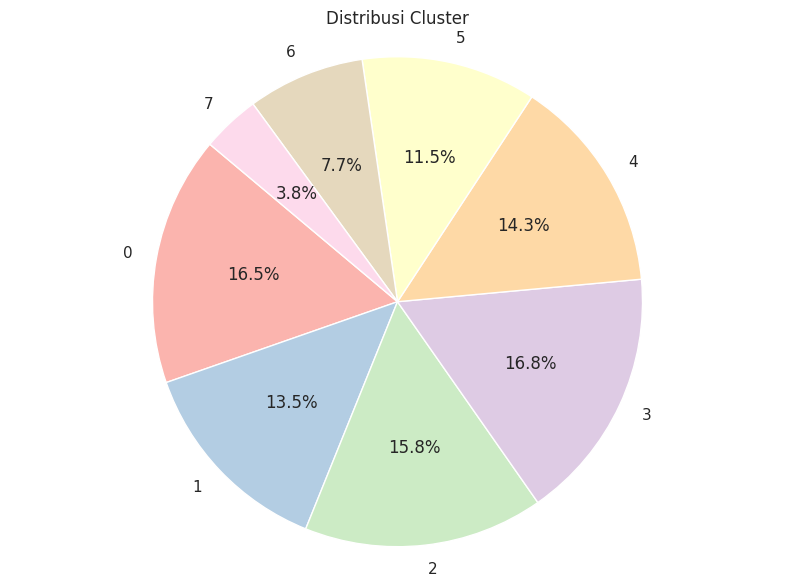

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total untuk masing-masing cluster
cluster_counts = selected_data['Cluster'].value_counts().sort_index()
print(cluster_counts)


cluster_summary = pd.DataFrame(cluster_counts, columns=['Total'])
print(cluster_summary)


plt.figure(figsize=(10, 7))
colors = plt.get_cmap('Pastel1').colors

plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Cluster')
plt.axis('equal')
plt.show()


####Hasil Analisis Visualisasi Pie Chart
- Cluster 3 merupakan cluster dengan jumlah paling banyak
- Cluster 7 merupakan cluster dengan jumlah paling sedikit

#### ANALISIS FITUR COMPOUND PADA CLUSTERING

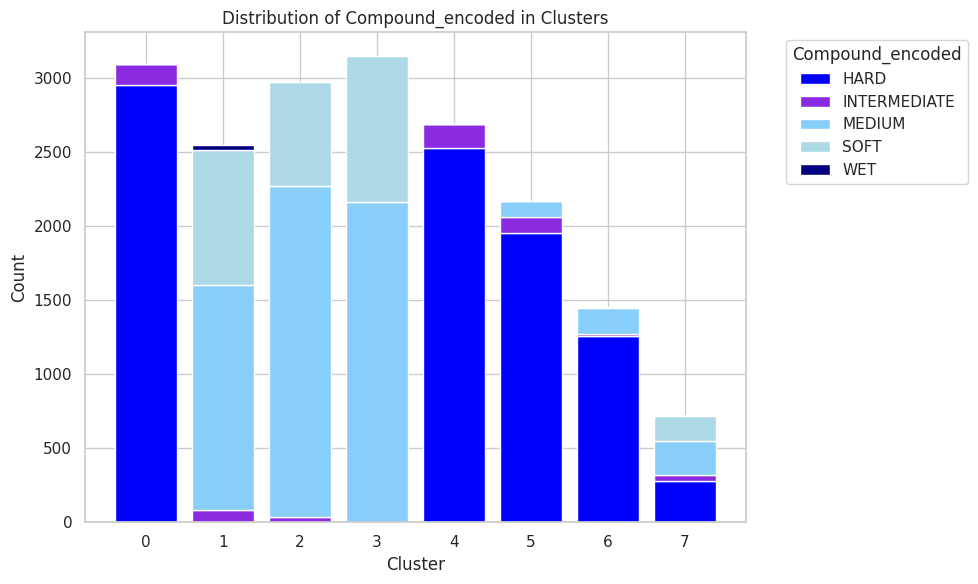

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

compound_mapping = {
    0: 'HARD',
    1: 'INTERMEDIATE',
    2: 'MEDIUM',
    3: 'SOFT',
    4: 'WET'
}

compound_distribution = pd.crosstab(selected_data['Cluster'], selected_data['Compound_encoded'])

# Membuat bar chart untuk distribusi kategori Compound_encoded dalam seluruh cluster
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#0000FF', '#8A2BE2', '#87CEFA', '#ADD8E6', '#000080']
width = 0.8  # Lebar setiap bar
bar_positions = np.arange(len(compound_distribution))  # Posisi setiap bar

bottom = np.zeros(len(compound_distribution))  # Inisialisasi bottom untuk setiap bar

for i, (column, values) in enumerate(compound_distribution.items()):
    ax.bar(bar_positions, values, width, bottom=bottom, label=compound_mapping[column], color=colors[i])
    bottom += values  # Update nilai bottom untuk bar berikutnya

ax.set_xticks(bar_positions)
ax.set_xticklabels(compound_distribution.index)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Compound_encoded in Clusters')
ax.legend(title='Compound_encoded', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Membuat DataFrame untuk menampung hasil
compound_summary = pd.DataFrame(columns=compound_distribution.index, index=compound_mapping.values())

# Mengisi DataFrame dengan jumlah masing-masing jenis Compound_encoded dalam setiap cluster
for cluster, counts in compound_distribution.iterrows():
    for compound, count in counts.items():
        compound_summary.at[compound_mapping[compound], cluster] = count

# Mengisi nilai yang kosong dengan 0
compound_summary.fillna(0, inplace=True)
# Transpose DataFrame untuk memindahkan cluster ke bagian bawah
compound_summary = compound_summary.T

# Menampilkan tabel
(compound_summary)



,HARD,INTERMEDIATE,MEDIUM,SOFT,WET
Cluster,,,,,
0,2951,142,0,0,0
1,4,81,1518,908,32
2,0,36,2232,705,0
3,0,0,2159,985,4
4,2528,158,0,0,0
5,1952,105,113,0,0
6,1258,9,179,7,0
7,279,41,229,171,2


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster," yang mewakili cluster yang ada.
- Sumbu y diberi label "Count," yang mewakili jumlah penggunaan compound pada masing-masing cluster.

Analisis:
- **Kluster 0 & 4**: Menunjukkan cluster yang cenderung memiliki compound jenis hard dan sedikit compound intermediate.

- **Kluster 2 & 3**: Menunjukkan cluster yang cenderung memiliki compound jenis medium dan sedikit compound soft dan ada beberapa  compound intermediate.
- **Kluster 6**: Menunjukkan cluster dengan compound dominan hard dan sedikit medium

- **Kluster 5, 6 & 7**: Menunjukkan cluster yang lebih bervariasi dengan compound dominan hard dan beberapa medium, soft,  dan intermediate.

- **Kluster 1**: Menunjukkan satu satunya cluster dimana compound wet terbanyak pada cluster ini dan  juga cenderung memiliki compound jenis medium & soft dan sedikit compound intermediate.





####ANALISIS FITUR  POS_CAT PADA CLUSTERING

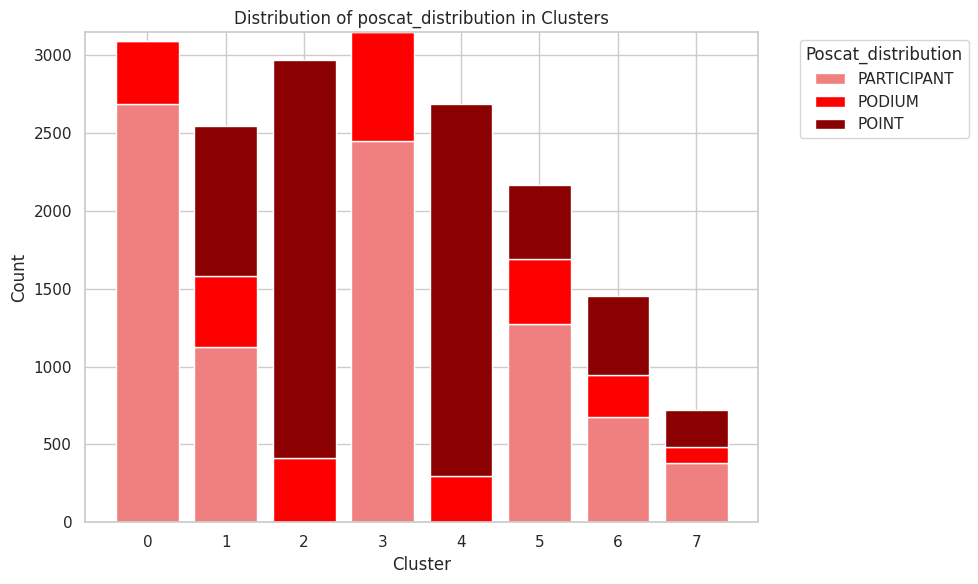

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

poscat_mapping = {
    0: 'PARTICIPANT',
    1: 'PODIUM',
    2: 'POINT',
}

poscat_distribution = pd.crosstab(selected_data['Cluster'], selected_data['Pos_cat_encoded'])

colors = ['lightcoral', 'red', 'darkred']

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.8  # Lebar setiap bar
bar_positions = np.arange(len(poscat_distribution))  # Posisi setiap bar

bottom = np.zeros(len(poscat_distribution))  # Inisialisasi bottom untuk setiap bar

for i, (column, values) in enumerate(poscat_distribution.items()):
    ax.bar(bar_positions, values, width, bottom=bottom, label=poscat_mapping[column], color=colors[i])
    bottom += values  # Update nilai bottom untuk bar berikutnya

ax.set_xticks(bar_positions)
ax.set_xticklabels(poscat_distribution.index)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of poscat_distribution in Clusters')
ax.legend(title='Poscat_distribution', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster," yang mewakili cluster yang ada.
- Sumbu y diberi label "Count," yang mewakili pos_cat pada masing-masing cluster.

Analisis:
- **Kluster 0 & 3**: Menunjukkan cluster yang cenderung mendapat posisi participant dan sedikit kelompok podium
- **Kluster 2 & 4**: Menunjukkan top cluster karena cenderung memiliki hasil yang baik yaitu dominan point dan beberapa podium.

- **Kluster 1, 5, 6 & 7**: Menunjukkan cluster yang lebih bervariasi dengan memiliki posisi dominan adalah participant diikuti point dan beberapa podium





####ANALISIS FITUR LapTimeSeconds PADA CLUSTERING

In [ ]:
selected_data

,LapTimeSeconds,Compound_encoded,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds,Pos_cat_encoded,Cluster
0,100.943,1.0,46.163,28.979,25.801,0.0,5
1,108.067,2.0,39.129,43.601,25.337,1.0,1
2,82.881,0.0,28.890,18.554,35.437,0.0,6
3,91.585,3.0,29.103,28.929,30.478,1.0,2
4,94.742,0.0,34.895,29.874,29.973,2.0,4
...,...,...,...,...,...,...,...
18783,85.235,0.0,30.620,30.668,23.947,0.0,0
18784,100.363,2.0,29.488,42.838,28.037,0.0,1
18785,112.495,3.0,32.659,49.567,30.269,0.0,1
18786,85.938,0.0,30.564,31.370,24.004,0.0,0


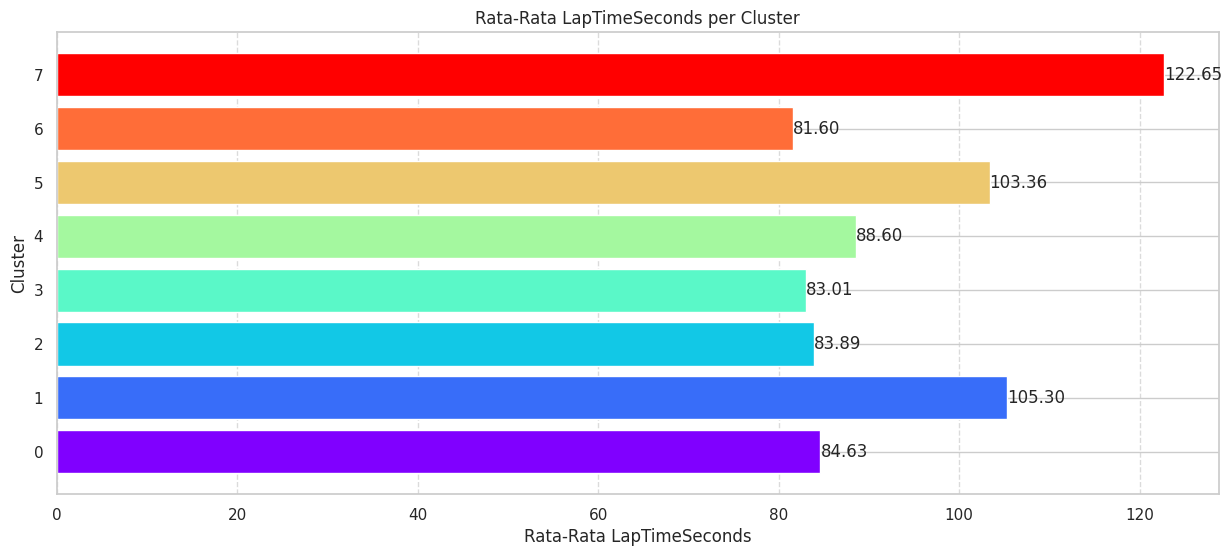

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Menghitung rata-rata LapTimeSeconds per cluster
avg_laptime_per_cluster = selected_data.groupby('Cluster')['LapTimeSeconds'].mean()

# Membuat bar chart dengan sumbu X sebagai rata-rata dan sumbu Y sebagai cluster
plt.figure(figsize=(15, 6))
bars = plt.barh(avg_laptime_per_cluster.index, avg_laptime_per_cluster.values, color=plt.cm.rainbow(np.linspace(0, 1, len(avg_laptime_per_cluster))))

# Menambahkan label pada ujung batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.ylabel('Cluster')
plt.xlabel('Rata-Rata LapTimeSeconds')
plt.title('Rata-Rata LapTimeSeconds per Cluster')
plt.yticks(np.arange(min(avg_laptime_per_cluster.index), max(avg_laptime_per_cluster.index)+1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Rata-Rata LapTime Seconds" yang mewakili ratarata laptime pembalap.
- Sumbu y diberi label "Cluster," yang mewakili  masing-masing cluster.

Analisis:
- **Kluster 6**: Menunjukkan cluster dengan performa terbaik dengan laptime terendah
- **Kluster 0,2,3 & 4**: Menunjukkan  cluster dengan rata rata laptime yang cenderung bagus juga

- **Kluster 1, 5, dan 7**: Menunjukkan cluster dengan performa terendah khususnya cluster 7 dengan rata rata laptime tertinggi





####ANALISIS FITUR SECTOR PADA CLUSTER

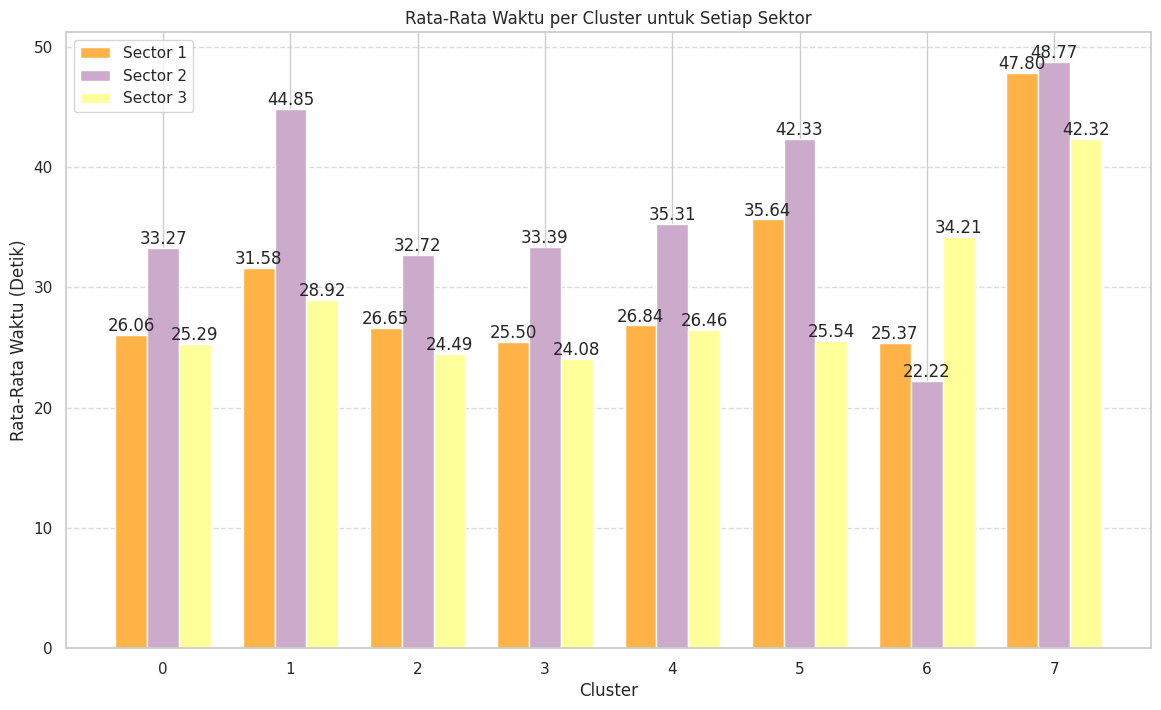

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung rata-rata untuk setiap sektor per cluster
avg_sector1_per_cluster = selected_data.groupby('Cluster')['Sector1TimeSeconds'].mean()
avg_sector2_per_cluster = selected_data.groupby('Cluster')['Sector2TimeSeconds'].mean()
avg_sector3_per_cluster = selected_data.groupby('Cluster')['Sector3TimeSeconds'].mean()

# Menggabungkan data rata-rata dalam satu DataFrame
avg_times_per_cluster = pd.DataFrame({
    'Sector1': avg_sector1_per_cluster,
    'Sector2': avg_sector2_per_cluster,
    'Sector3': avg_sector3_per_cluster
})

# Membuat bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.25  # Lebar setiap batang
indices = np.arange(len(avg_times_per_cluster))  # Indeks untuk sumbu X

# Membuat batang untuk setiap sektor dengan warna pastel
bars1 = plt.bar(indices - bar_width, avg_times_per_cluster['Sector1'], width=bar_width, label='Sector 1', color='#FFB347')  # Jingga pastel
bars2 = plt.bar(indices, avg_times_per_cluster['Sector2'], width=bar_width, label='Sector 2', color='#CBAACB')  # Ungu pastel
bars3 = plt.bar(indices + bar_width, avg_times_per_cluster['Sector3'], width=bar_width, label='Sector 3', color='#FFFF99')  # Kuning pastel

# Menambahkan label pada ujung batang
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Rata-Rata Waktu (Detik)')
plt.title('Rata-Rata Waktu per Cluster untuk Setiap Sektor')
plt.xticks(indices, avg_times_per_cluster.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster" yang mewakili masing masing cluster
- Sumbu y diberi label "Rata-rata waktu," yang mewakili nilai rata-rata waktu pada 3 sector untuk masing-masing cluster.

Analisis:
- **Kluster 0,2,3, dan 6**: Menunjukkan cluster dengan performa terbaik dengan rata-rata waktu yang rendah dan beriringan
- **Kluster 1,4,5**: Menunjukkan  cluster dengan rata rata waktu yang sedang dan menengah

- **Kluster 7**: Menunjukkan cluster dengan performa terendah dengan rata rata waktu yang terlama



